# Projet 2 : Concevez une application au service de la santé publique
# Nettoyage

## 1. Importation des données

In [1]:
import pandas as pd
import numpy as np

raw = pd.read_csv("en_openfoodfacts_org_products.csv", sep = '\t', low_memory=False)
# les colonnes du fichier sont  séparées par des tabulations
raw.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taille du dataset

In [2]:
raw.shape

(1632571, 186)

Informations sur le dataset

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632571 entries, 0 to 1632570
Columns: 186 entries, code to carnitine_100g
dtypes: float64(124), int64(2), object(60)
memory usage: 2.3+ GB


## 2. Exploration des données

### 2.1 Recherche d'informations sur quelques colonnes

#### a. Type de produit

On va explorer les colonnes catégories qui vont nous être utiles pour classer les produits.

In [4]:
raw["categories"].value_counts()

Snacks                                                                                                                      32555
Snacks, Sweet snacks, Confectioneries                                                                                       14198
Groceries, Sauces                                                                                                           13681
Dairies, Fermented foods, Fermented milk products, Cheeses                                                                  11318
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                                                           9909
                                                                                                                            ...  
Entree chaude                                                                                                                   1
parfum d'ambiance en spray                                                                

In [5]:
raw["main_category"].value_counts()

en:snacks                               32732
en:sauces                               15483
en:confectioneries                      14997
en:cheeses                              14174
en:biscuits                             13692
                                        ...  
en:raw-chestnut                             1
fr:farine-complete-de-petit-epeautre        1
fr:riz-basmati-demi-complet                 1
fr:vin-avec-alcool                          1
it:cereali-senza-glutine                    1
Name: main_category, Length: 28880, dtype: int64

"main_category" a environ 3 fois moins de valeurs que "categories" (28880 vs 97975), donc elle est plus facilement exploitable .

In [6]:
raw["labels"].value_counts()

Bio                                                                                        20887
Organic                                                                                    16998
en:gluten-free                                                                             11534
Fabriqué en France                                                                          9615
Point Vert                                                                                  8041
                                                                                           ...  
Sans conservateurs, en:palm-oil-free, Aux oeufs frais                                          1
No preservatives,Made in France                                                                1
Contiene leche, Punto Verde, Sin colorantes, Sin conservantes                                  1
Point Vert, Fabriqué en France, Sans colorants, Sans huile de palme, Sans conservateurs        1
Gluten-free,Palm-oil-free     

Beaucoup de valeurs prises pour la colonne "labels", ainsi que des dénominations à rallonge.
Ces informations ne seront pas utiles pour la suite.

#### b. Type de pays

In [7]:
raw["countries"].value_counts()

France                           397919
United States                    308704
en:fr                            185068
en:france                         63642
en:it                             44429
                                  ...  
République de Macédoine               1
Serbia, Kosovo                        1
Bosna i Hercegovina,Crna Gora         1
en:ME                                 1
en:BE, España                         1
Name: countries, Length: 9279, dtype: int64

In [8]:
raw['countries_tags'].value_counts()
#"countries_tags" = list of countries where the product is sold

en:france                                                   696243
en:united-states                                            376740
en:spain                                                     74573
en:germany                                                   70457
en:italy                                                     53603
                                                             ...  
en:france,en:germany,en:italy,en:russia                          1
en:japan,en:spain                                                1
en:germany,en:spain,fr:deutschland                               1
en:czech-republic,en:france,en:germany,en:united-kingdom         1
en:cameroon,en:italy                                             1
Name: countries_tags, Length: 3614, dtype: int64

'countries_tags' prend moins de valeurs que "countries" (3614 vs 9279). Par ailleurs, les valeurs semblent avoir des "formes un peu standardisées" -> en:country.

On va donc garder la colonne 'countries_tags' pour faire notre premier tri.

#### c. Nutriscore

In [9]:
raw["nutrition-score-fr_100g"].value_counts()

 14.0    32437
 0.0     31351
 11.0    28375
 13.0    28224
 2.0     26821
 12.0    26000
 15.0    25961
 1.0     25853
 3.0     25306
 16.0    24147
-1.0     23419
 4.0     22764
 5.0     20432
 17.0    19262
-4.0     17962
 19.0    17468
 18.0    17250
 10.0    16396
 6.0     16131
-2.0     16122
 20.0    15898
-3.0     14951
 21.0    13155
 9.0     12651
 7.0     12312
 8.0     11865
 24.0    11114
 22.0    10626
-5.0     10307
 23.0    10272
 25.0     9312
 26.0     8423
-6.0      8382
 27.0     5265
-7.0      3616
-8.0      2493
 28.0     1884
-9.0      1213
-10.0      881
 29.0      593
 30.0      382
-11.0      350
-12.0      261
 31.0      153
-13.0      151
 32.0       81
 33.0       73
-14.0       70
 34.0       52
 35.0       36
 36.0       26
 37.0       12
 40.0        8
 38.0        4
-15.0        3
 39.0        1
Name: nutrition-score-fr_100g, dtype: int64

On a bien des integers conformément à la définition du nutriscore.

In [10]:
raw["nutrition_grade_fr"].value_counts()

KeyError: 'nutrition_grade_fr'

Message d'erreur obtenu, on ne va donc pas garder cette colonne qui était censée nous donner la "lettre" du nutriscore.

=> On fera donc l'attribution par nous-même ultérieurement.

### 2.2 Filtrage des données
#### a. Filtrage par le pays

In [11]:
# fonction qui prend comme paramètre un dataFrame df et une colonne col
# et qui returne la fréquence de chaque valeur prise dans la colonne
def fq_val(df,col) :
    
    return (df[col].value_counts()/df[col].count())*100

In [12]:
fq_val(raw,'countries_tags')

en:france                                                   42.776228
en:united-states                                            23.146396
en:spain                                                     4.581664
en:germany                                                   4.328783
en:italy                                                     3.293296
                                                              ...    
en:france,en:germany,en:italy,en:russia                      0.000061
en:japan,en:spain                                            0.000061
en:germany,en:spain,fr:deutschland                           0.000061
en:czech-republic,en:france,en:germany,en:united-kingdom     0.000061
en:cameroon,en:italy                                         0.000061
Name: countries_tags, Length: 3614, dtype: float64

La valeur "en:france" contient quasiment 43% des data.

On va regarder également pour toutes les valeurs de 'countries_tags' qui contiennent "franc".

In [13]:
df = raw[raw['countries_tags'].str.contains('franc', na=False)]
#na = False lui indique d'ignorer les NaN
df = df.reset_index(drop = True)
df.shape

(755045, 186)

In [14]:
fq_val(df,'countries_tags')

en:france                                                                                                           92.212120
en:france,en:germany                                                                                                 1.460840
en:france,en:switzerland                                                                                             1.093975
en:belgium,en:france                                                                                                 1.062453
en:france,en:spain                                                                                                   0.541425
                                                                                                                      ...    
en:austria,en:denmark,en:france,en:germany,en:guadeloupe,en:morocco,en:switzerland                                   0.000132
en:belgium,en:france,en:germany,en:portugal                                                                          0

Dans ce filtrage, la valeur "en:france" représente 92% des valeurs prises par la colonne "countries_tags", on va donc ne garder que cette valeur.

In [15]:
df_FR = df[df['countries_tags']=='en:france']
df_FR = df_FR.reset_index(drop = True)
df_FR.shape

(696243, 186)

#### b. Colonnes gardées dans le cadre de l'étude

On va garder les variables (=colonnes) suivantes :
- code : barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix
- product_name : name of the product
- brands
- main_category
- energy_100g
- energy-kJ_100g (utile si energy-kal est absente)
- energy-kcal_100g
- proteins_100g
- carbohydrates_100g
- sugars_100g
- fat_100g
- saturated-fat_100g
- sodium_100g
- additives_n
- ingredients_from_palm_oil_n
- nutrition-score-fr_100g

In [16]:
data_FR = df_FR[["code","product_name","brands","main_category","energy_100g","energy-kj_100g","energy-kcal_100g",
                 "proteins_100g","carbohydrates_100g", "sugars_100g","fat_100g",
                 "saturated-fat_100g","sodium_100g","additives_n","ingredients_from_palm_oil_n",
                 "nutrition-score-fr_100g"]]
data_FR = data_FR.reset_index(drop = True)
data_FR.shape

(696243, 16)

On vérifie le type des colonnes.

In [17]:
data_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696243 entries, 0 to 696242
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         696243 non-null  object 
 1   product_name                 676210 non-null  object 
 2   brands                       353590 non-null  object 
 3   main_category                321118 non-null  object 
 4   energy_100g                  531669 non-null  float64
 5   energy-kj_100g               62634 non-null   float64
 6   energy-kcal_100g             510096 non-null  float64
 7   proteins_100g                528300 non-null  float64
 8   carbohydrates_100g           526777 non-null  float64
 9   sugars_100g                  529771 non-null  float64
 10  fat_100g                     526788 non-null  float64
 11  saturated-fat_100g           530469 non-null  float64
 12  sodium_100g                  512959 non-null  float64
 13 

Les 4 premières catégories sont de type "object" et le reste de type "float" => cohérent pour la suite.

## 3. Nettoyage "global" des données

On va regarder les valeurs manquantes dans le dataset.

In [18]:
# fonction qui prend comme paramètre un dataFrame df 
# et qui returne le % de valeurs manquantes
def per_missing(df) :
    
    return df.isnull().sum() *100 /len(df)

In [19]:
per_missing(data_FR)

code                            0.000000
product_name                    2.877300
brands                         49.214570
main_category                  53.878459
energy_100g                    23.637437
energy-kj_100g                 91.004003
energy-kcal_100g               26.735924
proteins_100g                  24.121320
carbohydrates_100g             24.340065
sugars_100g                    23.910043
fat_100g                       24.338485
saturated-fat_100g             23.809791
sodium_100g                    26.324717
additives_n                    71.156478
ingredients_from_palm_oil_n    71.156478
nutrition-score-fr_100g        65.072396
dtype: float64

Pas de valeurs manquantes pour le code.

On remarque le même pourcentage de valeurs manquantes pour "additives_n" et "ingredients_from_palm_oil_n"

### 3.1 Colonne "product_name"

Environ 3% des produits sont sans nom => on va les supprimer.

In [20]:
test = data_FR[data_FR["product_name"].notna()]
test.shape

(676210, 16)

On regarde le % de valeurs manquantes.

In [21]:
per_missing(test)

code                            0.000000
product_name                    0.000000
brands                         48.518508
main_category                  52.722083
energy_100g                    21.575398
energy-kj_100g                 90.828589
energy-kcal_100g               24.744828
proteins_100g                  22.070215
carbohydrates_100g             22.294110
sugars_100g                    21.850756
fat_100g                       22.292187
saturated-fat_100g             21.746055
sodium_100g                    24.336079
additives_n                    70.479585
ingredients_from_palm_oil_n    70.479585
nutrition-score-fr_100g        64.101684
dtype: float64

### 3.2 Colonne "brands"

On va remplacer les "brands" manquantes par "Unknown".

In [22]:
test2 = test.fillna({'brands' : "Unknown"})

On va mettre en minuscule les brands et product_name.

In [23]:
test3 = test2.copy()
test3["brands"] = test3["brands"].str.lower()
test3["product_name"] = test3["product_name"].str.lower()
test3 = test3.reset_index(drop=True)
test3.shape

(676210, 16)

### 3.3 Colonne "main_category"

On va supprimer les valeurs manquantes dans main_category car on a besoin dans la suite d'identifier les produits selon leur catégorie.

In [24]:
test4 = test3.copy()
test4 = test4[test4["main_category"].notna()]
test4 = test4.reset_index(drop=True)
test4.shape

(319698, 16)

In [25]:
per_missing(test4)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                    17.853724
energy-kj_100g                 82.332701
energy-kcal_100g               24.089610
proteins_100g                  18.140245
carbohydrates_100g             18.325107
sugars_100g                    18.224074
fat_100g                       18.297894
saturated-fat_100g             18.274747
sodium_100g                    19.264431
additives_n                    49.253045
ingredients_from_palm_oil_n    49.253045
nutrition-score-fr_100g        24.069591
dtype: float64

### 3.4 Recherche de doublons

In [26]:
test4.drop_duplicates(keep = 'first', inplace=True)
test4 = test4.reset_index(drop=True)
test4.shape

(319696, 16)

Seulement 2 doublons éliminés par cette méthode.

On va regarder les doublons sur la triplette 'product_name', 'brands' et 'main_category' car ces colonens ont 0 valeur manquante.

In [27]:
# Selecting duplicate rows based
# on list of column names
duplicate = test4[test4.duplicated(['product_name', 'brands','main_category'])]
duplicate

,code,product_name,brands,main_category,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
59,0000010203668,colorant alimentaire,unknown,en:food-colorings,2142.0,NaN,512.0,0.0,0.0,0.0,0.25,0.02,0.000,NaN,NaN,NaN
65,00000127,miel de lavande,unknown,en:lavender-honeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,00002073,pain au chocolat pur beurre,unknown,en:chocolate-croissant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,0000484,miel de fleurs,unknown,en:flower-honeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,0000485,miel,unknown,en:honeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319686,8008690021239,latte intero uht a lunga conservazione,unknown,en:whole-milks,268.0,NaN,64.0,3.2,4.8,4.8,3.60,2.40,0.052,NaN,NaN,2.0
319687,8008690021253,latte intero uht a lunga conservazione,unknown,en:whole-milks,268.0,NaN,64.0,3.2,4.8,4.8,3.60,2.40,0.040,NaN,NaN,2.0
319688,8008690022236,latte parzialmente scremato uht a lunga conser...,unknown,en:semi-skimmed-milks,192.0,NaN,46.0,3.3,4.9,4.9,1.60,1.00,0.052,NaN,NaN,-1.0
319692,8008693009869,truite fumée,unknown,en:smoked-trouts,649.0,NaN,155.0,23.0,0.0,0.0,7.00,2.50,1.160,NaN,NaN,13.0


Environ 20% de doublons.

On va supprimer ces doublons.

In [28]:
test5 = test4.copy()
test5 = test5.drop_duplicates(subset=['product_name', 'brands','main_category'], keep='first')
# on garde le 1er élément rencontré
test5 = test5.reset_index(drop=True)
test5.shape

(259229, 16)

In [29]:
per_missing(test5)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                    16.599609
energy-kj_100g                 79.568644
energy-kcal_100g               23.887759
proteins_100g                  16.864240
carbohydrates_100g             17.064063
sugars_100g                    17.037446
fat_100g                       17.048633
saturated-fat_100g             17.171304
sodium_100g                    18.048907
additives_n                    41.045562
ingredients_from_palm_oil_n    41.045562
nutrition-score-fr_100g        23.120098
dtype: float64

### 3 .4 Suppression de lignes 

#### a. Avec trop de valeurs manquantes

On va garder les lignes contenant au moins 7 valeurs non NA (sur 12).

In [32]:
test6 = test5.copy()
test6= test6.dropna(thresh=7)
#thresh: Require that many non-NA values.
test6 = test6.reset_index(drop=True)
test6.shape

(217129, 16)

Environ 16% de lignes supprimées.

In [35]:
per_missing(test6)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                     0.578919
energy-kj_100g                 75.610351
energy-kcal_100g                9.276974
proteins_100g                   0.747942
carbohydrates_100g              0.986510
sugars_100g                     1.065265
fat_100g                        0.973615
saturated-fat_100g              1.343902
sodium_100g                     2.734780
additives_n                    36.779518
ingredients_from_palm_oil_n    36.779518
nutrition-score-fr_100g         8.278489
dtype: float64

#### b. Dont les colonnes ont moins de 1% de valeurs manquantes

In [36]:
test7 = test6.copy()
for col in test7.columns : 
    if test7[col].isnull().sum() *100 /len(test7) < 1 :
        test7 = test7[test7[col].notna()]
test7 = test7.reset_index(drop=True)
test7.shape

(212724, 16)

Environ 2% de lignes supprimées.

## 4. Nettoyage "ciblé" selon les catégories retenues

### 4.1 Catégories retenues

L'application va porter sur le gouter constitué d'un ou deux produits suivants :
- 1 produit céréalier sous forme de gâteau, que l'on catégorisera par la suite par "biscuits"
- 1 produit laitier sous forme de yaourt, que l'on catégorisera par la suite par "yogurts"
- 1 produit à base de fruits sous forme de jus de fruits, que l'on catégorisera par la suite par "fruit-juices"

Elles doivent contenir au moins les mots suivants :
- biscuit
- cookie
- cake
- muffin
- gâteau
- gateau
- yogurt
- yoghurt
- yaourt
- juice
- jus

On ne met pas de mot-clé "fruit" car cela va contenir les produits dérivés de fruits (fruits secs,compotes...) . On considère que juice et jus suffisent.

In [37]:
# la colonne "main_category" doit contenir le string 'biscuit' ou 'cake' ou etc..
# regex = True pour dire que le pat (=string écrit) est une regular expression
test8 = test7[test7['main_category'].str.contains('biscuit|cookie|cake|muffin|gateau|gâteau|yogurt|yoghurt|yaourt|juice|jus', 
                                                  regex = True)]

test8 = test8.reset_index(drop=True)
test8.shape

(18444, 16)

In [38]:
per_missing(test8)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                     0.000000
energy-kj_100g                 72.153546
energy-kcal_100g               10.079159
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     1.756669
additives_n                    30.183257
ingredients_from_palm_oil_n    30.183257
nutrition-score-fr_100g         2.748861
dtype: float64

### 4.2 Suppression de valeurs manquantes faibles

On va supprimer les valeurs manquantes dans nutrition-score-fr_100g (<3%).

In [39]:
test9 = test8.copy()
test9 = test9[test9["nutrition-score-fr_100g"].notna()]
test9 = test9.reset_index(drop=True)
test9.shape

(17937, 16)

In [40]:
per_missing(test9)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                     0.000000
energy-kj_100g                 71.745554
energy-kcal_100g               10.207950
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    29.363885
ingredients_from_palm_oil_n    29.363885
nutrition-score-fr_100g         0.000000
dtype: float64

On a éliminé les valeurs manquantes pour le sodium par la même occasion.

### 4.3 Nettoyage dans la colonne 'main_category'

On regarde le nombre de catégories.

In [41]:
test9['main_category'].value_counts()

en:biscuits                      1366
en:chocolate-biscuits             642
en:shortbread-cookies             620
en:cakes                          574
en:yogurts                        454
                                 ... 
en:savory-cake                      1
fr:cake-chorizo-poivron-rouge       1
fr:biscuits-aromatisee              1
fr:yaourts-de-soja-a-l-amande       1
fr:farines-biscuitieres             1
Name: main_category, Length: 898, dtype: int64

898 catégories différentes. On ne va pas les traiter à la main.

On ne va retenir que les "main_category" contenant un certain nombre de données, tout en gardant un nombre de "main_category" exploitable.
En effet, on veut pouvoir bien catégoriser chaque produit : on veut avoir une liste de produits qui conviennent à un goûter pour enfants (on ne va pas donner un "cake-chorizo-poivron-rouge" ou "farines-biscuitieres" pour le goûter) . On veut pouvoir traiter cette liste "à la main".

On regarde l'occurence des valeurs dans la colonne 'main_category'.

In [42]:
# affiche les occurences des valeurs dans la colonne 'main_category', triées par ordre croisant
occur = test9['main_category'].value_counts().sort_values().unique()
occur

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   31,   32,   34,   36,
         38,   39,   40,   41,   43,   44,   45,   46,   48,   52,   54,
         55,   57,   58,   59,   60,   61,   62,   63,   64,   67,   73,
         74,   76,   77,   81,   83,   84,   85,   86,   89,   91,   94,
         96,   97,   98,  103,  105,  111,  118,  119,  121,  127,  130,
        132,  134,  139,  163,  175,  181,  184,  196,  204,  205,  206,
        226,  227,  245,  249,  254,  264,  270,  285,  312,  313,  339,
        346,  400,  412,  454,  574,  620,  642, 1366])

In [43]:
#Fonction qui retourne pour une colonne donnée (col) d'un dataframe df
# (l'occurence d'une valeur prise x fois) * x pour avoir le nombre de produits
def occur_cat(col,df,x) :
    
    cat1=[]
    for cat in col.unique() : #pour chaque valeur unique de catégorie dans la colonne col
        if len(df[col == cat]) == x: #si longueur de cette catégorie = x
            cat1.append(cat) #l'ajoute dans la liste vide
    return x*len(cat1) 

In [44]:
# Fonction qui retourne, pour une colonne donnée (col) d'un dataframe df,
# le nombre de produits par occurence (occur)
def nb_prod(col,df) :
    
    nb_prod = []
    occur = col.value_counts().sort_values().unique() # on recupère la liste des occurences de col
    for x in occur :
        nb_prod.append(occur_cat(col, df, x)) #ajoute nb de produits par occurence
    return nb_prod

On regarde le nombre de produits par occurence dans la colonne 'main_category'.

In [45]:
nb = nb_prod(test9["main_category"],test9)
nb

[454,
 182,
 156,
 140,
 155,
 36,
 70,
 88,
 90,
 70,
 154,
 72,
 91,
 112,
 30,
 112,
 102,
 54,
 114,
 40,
 21,
 66,
 46,
 144,
 50,
 78,
 135,
 56,
 145,
 93,
 64,
 68,
 72,
 76,
 39,
 40,
 82,
 172,
 44,
 45,
 46,
 96,
 52,
 54,
 110,
 57,
 174,
 59,
 60,
 61,
 124,
 63,
 128,
 134,
 146,
 148,
 76,
 77,
 81,
 83,
 84,
 85,
 86,
 89,
 91,
 94,
 96,
 97,
 98,
 103,
 105,
 111,
 118,
 119,
 121,
 254,
 130,
 132,
 268,
 139,
 163,
 175,
 181,
 184,
 196,
 204,
 410,
 206,
 226,
 227,
 245,
 249,
 254,
 264,
 270,
 285,
 312,
 626,
 339,
 346,
 400,
 412,
 454,
 574,
 620,
 642,
 1366]

In [46]:
# On vérifie qu'on a bien le bon nombre de lignes.
sum(nb) == len(test9)

True

On va représenter graphiquement le nombre de produits selon la taille de la catégorie.

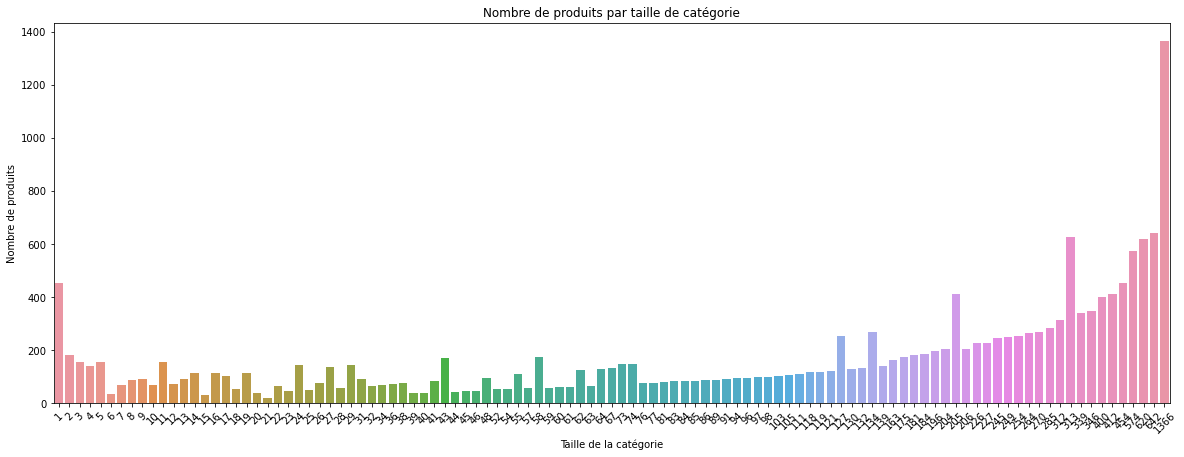

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
#initialisation de la figure
fig = plt.figure(figsize=(20,7)) # taille de la figure

g = sns.barplot(x=occur,y=nb)
g.set_xticklabels(labels = occur, rotation=45) # rotation de 45° pour meilleure visibilité sur axe des x
plt.xlabel("Taille de la catégorie")
plt.ylabel("Nombre de produits")
plt.title("Nombre de produits par taille de catégorie")
plt.show()

On va regarder quelle est la proportion de produits (par rapport au nombre total de produits dans le dataset) dont la valeur dans "main_category" est prise moins d'un certain nombre de fois.

In [66]:
# Fonction qui retourne, pour une colonne donnée (col) d'un dataframe df,
# le pourcentage du nombre de produits dont la valeur est prise moins de y fois
def perc_prod(col,df,y) :
    
    nb_prod = []
    occur = col.value_counts().sort_values().unique()
    for x in occur :
        if x <= y :
            nb_prod.append(occur_cat(col, df, x)) 
            #appel de la fonction occur_cat qui retourne le nombre de produits par occurence
                                                
    return sum(nb_prod)/len(df) *100

On va regarder quelle est la proportion de produits dont la valeur dans "main_category" est prise moins de 200 fois.

In [67]:
perc_prod(test9["main_category"],test9,200)

50.209065061047

Les valeurs de catégories prises moins de 200 fois représentent 50% du dataset. Cela fait beaucoup de données à supprimer si on garde cette valeur.

On va regarder quelle est la proportion de produits dont la valeur dans "main_category" est prise moins de x fois par tranche de 50. 

In [75]:
# Fonction qui retourne, pour une colonne donnée (col) d'un dataframe df,
# le pourcentage du nombre de produits dont la valeur est prise moins de z fois, 
# par tranche de 50 pour la taille de la catégorie
def imp_perc(col, df, z) :
    
    pourc_prod = []
    for y in range(1,z,50) :
        print("Valeur prise au moins : %d fois" %y)
        print("Proportion : ", perc_prod(col,df,y))

In [77]:
imp_perc(test9["main_category"],test9, 202)

Valeur prise au moins : 1 fois
Proportion :  2.5310810057423203
Valeur prise au moins : 51 fois
Proportion :  22.300273178346437
Valeur prise au moins : 101 fois
Proportion :  36.27696939287507
Valeur prise au moins : 151 fois
Proportion :  45.197078664213635
Valeur prise au moins : 201 fois
Proportion :  50.209065061047


Les valeurs de "main_category" prises une seule fois représentent 2.5% du dataset.

Les valeurs de "main_category" prises au plus 50 fois représentent 22% du dataset.

On va regarder le nombre de "main_category" selon que l'on garde au moins 1, 52, 103, 163 ou 204 (valeurs dans occur) valeurs de "main_category".

On cherche un compromis nombre de "main_category" à traiter/nombre de lignes éliminées.

In [51]:
#fonction qui permet de retourner pour une colonne donnée (col) d'un dataframe df
# la longueur de la liste des valeurs prises au moins x fois

def long_cat(col,df,x) :
    
    cat1=[]
    for cat in col.unique() :
        if len(df[col == cat]) >= x:
            cat1.append(cat)
    return len(cat1)

In [52]:
long = [1,52, 103, 163, 204]
for i in long :
    print("Valeur prise au moins : %d fois" %i)
    print("Nombre de catégories à traiter :" long_cat(test9["main_category"],test9,i))

Valeur prise au moins : 1 fois
898
Valeur prise au moins : 52 fois
77
Valeur prise au moins : 103 fois
42
Valeur prise au moins : 163 fois
29
Valeur prise au moins : 204 fois
24


On va ne garder que les "main_category" qui contiennent au moins 52 produits, ce qui élimine 22% des données mais 77 valeurs de "main_category" à vérifier.

In [78]:
#fonction qui permet de retourner pour une colonne donnée (col) d'un dataframe df
# la liste des valeurs prises au moins x fois

def tri_cat_supL(col,df,x) :
    
    cat1=[]
    for cat in col.unique() :
        if len(df[col == cat]) >= x: 
            cat1.append(cat)
    return cat1

In [79]:
#liste des catégories
liste_cat = tri_cat_supL(test9["main_category"],test9,52)
liste_cat

['en:squeezed-apple-juices',
 'en:chocolate-biscuity-bars',
 'en:biscuit-with-fruit-covering',
 'en:fruit-cakes',
 'en:apple-juices',
 'en:chocolate-cake-with-melting-centre',
 'en:chocolate-muffins',
 'en:chocolate-biscuits',
 'en:biscuits',
 'en:cakes',
 'en:sheep-milk-yogurts',
 'en:oatmeal-cookies',
 'en:greek-style-yogurts',
 'en:pancakes',
 'en:lemon-juice',
 'en:puffed-rice-cakes',
 'en:puffed-rice-cakes-with-black-chocolate',
 'en:assortments-of-biscuits',
 'en:concentrated-multifruit-juices',
 'en:biscuits-and-cakes',
 'en:fruit-juices',
 'en:yogurts',
 'en:lemon-yogurts',
 'en:muffins',
 'en:orange-juices',
 'en:chocolate-sandwich-cookies',
 'en:almond-cookies',
 'en:low-fat-yogurts',
 'en:shortbread-cookies',
 'en:squeezed-orange-juices',
 'en:grape-juices',
 'en:filled-biscuits',
 'en:dry-biscuits',
 'en:puffed-corn-cakes',
 'en:chocolate-chip-cookies',
 'en:fruit-yogurts',
 'en:raspberry-yogurts',
 'en:stirred-yogurts',
 'en:pineapple-juices',
 'en:strawberry-yogurts',
 'e

In [80]:
len(liste_cat)

77

On ne garde pas les valeurs de "main_category" suivantes car elles ne sont pas adaptées pour un gouter :
- 'en:tomato-juices'
- 'en:frozen-cakes-and-pastries'
- 'en:king-cakes'
- 'en:carrot-juices'
- 'en:vegetable-cakes'

Ces valeurs-ci ne sont pas adaptées pour des enfants :
- 'en:yoghurts-high-in-protein-on-a-fruit-layer'
- 'en:low-fat-yogurts'

In [81]:
# lister des valeurs à supprimer
a_supprim = ['en:frozen-cakes-and-pastries','en:king-cakes', 'en:yoghurts-high-in-protein-on-a-fruit-layer',
             'en:tomato-juices', 'en:carrot-juices','en:low-fat-yogurts','en:vegetable-cakes']

# création de la liste l_gouter qui va contenir les valeurs de "main_category" à garder
l_gouter = liste_cat.copy()
for val in a_supprim :
    l_gouter.remove(val)
len(l_gouter)

70

On va construire notre nouveau dataframe.

D'abord, on construit le dataframe avec les "main_category" qui contiennent au moins 52 produits

In [82]:
# fonction qui crée nouveau dataframe à partir d'un dataframe (df), en filtrant sur les valeurs 
# retenues d'une colonne (col) et du nb minimum (x) d'occurences de ces valeurs
def new_df(col,df,x) :
    n_df = df
    cat1 = tri_cat_supL(col,df,x) # appel de la fonction qui retourne la liste des valeurs d'une colonne 
                                  # dont l'occurence est au moins x
    for cat in col :
        if cat not in cat1 :
            n_df = n_df.drop(n_df.loc[col==cat].index)
    return n_df.reset_index(drop=True)

In [83]:
dfN1 = new_df(test9["main_category"],test9,52)
dfN1.shape

(13937, 16)

Ensuite, on filtre les valeurs de "main_category" non contenues dans l_gouter.

In [84]:
dfN2 = dfN1.copy()
for cat in dfN2["main_category"] :
    if cat not in l_gouter :
        dfN2 = dfN2.drop(dfN2.loc[dfN2["main_category"]==cat].index)
dfN2 = dfN2.reset_index(drop=True)
dfN2.shape

(12922, 16)

In [85]:
per_missing(dfN2)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                     0.000000
energy-kj_100g                 72.094103
energy-kcal_100g               10.238353
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    29.848321
ingredients_from_palm_oil_n    29.848321
nutrition-score-fr_100g         0.000000
dtype: float64

### 4.3 Valeurs manquantes dans la colonne 'energy-kcal_100g'

In [86]:
dfN2

,code,product_name,brands,main_category,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
0,000000001576,pur jus de pomme,les jardins de gaïa,en:squeezed-apple-juices,925.0,NaN,221.0,0.5,0.01,0.01,0.50,0.1,0.004,NaN,NaN,0.0
1,0000034054086,kitkat white wafers,unknown,en:chocolate-biscuity-bars,920.0,NaN,220.0,2.0,27.00,19.00,12.00,8.0,0.000,NaN,NaN,13.0
2,0000069168048,tarte aux abricots,unknown,en:biscuit-with-fruit-covering,1029.0,NaN,246.0,3.3,40.00,25.00,8.00,4.9,0.052,6.0,0.0,12.0
3,000031,cakes aux fruits,bijou,en:fruit-cakes,1670.0,1670.0,NaN,4.9,60.00,34.00,15.00,2.0,0.240,11.0,0.0,13.0
4,00005333,jus de pomme,helior,en:apple-juices,180.0,NaN,43.0,0.5,10.00,9.70,0.50,0.0,0.012,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,8007730010608,mini cookies,unknown,en:biscuits,2096.0,NaN,501.0,5.7,64.00,33.00,24.00,13.0,0.272,NaN,NaN,26.0
12918,8007735194310,sapori di vipiteno,sterzing vipiteno,en:yogurts,431.0,NaN,103.0,3.4,13.00,12.00,3.70,2.6,0.040,NaN,NaN,3.0
12919,80080305,lemon juice from sicily,unknown,en:lemon-juice,113.0,NaN,27.0,0.4,2.00,2.00,0.03,0.0,0.004,NaN,NaN,-4.0
12920,8008620003731,cuormi,crich,en:filled-biscuits,1816.0,NaN,434.0,5.5,66.00,30.00,16.00,2.4,0.080,NaN,NaN,13.0


Il manque 10% de valeurs manquantes pour energy-kcal.

Quand la valeur en "energy-kcal_100g" est un NaN et que la valeur en "energy-kj_100g" est connue, on remplace le NaN par (valeur en "energy-kj_100g")*0.239 dans la colonne "energy-kcal_100g".

In [87]:
import math
dfN3 = dfN2.copy()
for indx, val in dfN3.iterrows() :
    if (math.isnan(dfN3["energy-kj_100g"].iloc[indx]) == False) & (math.isnan(
        dfN3["energy-kcal_100g"].iloc[indx]) == True): 
        #si valeur en "energy-kj_100g" connue et si valeur en "energy-kcal_100g" NaN
        dfN3["energy-kcal_100g"].iloc[indx]= int(dfN3["energy-kj_100g"].iloc[indx]*0.2390)
        #on remplace le NaN par (valeur en "energy-kj_100g")*0.239 dans la colonne "energy-kcal_100g
dfN3

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,code,product_name,brands,main_category,energy_100g,energy-kj_100g,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
0,000000001576,pur jus de pomme,les jardins de gaïa,en:squeezed-apple-juices,925.0,NaN,221.0,0.5,0.01,0.01,0.50,0.1,0.004,NaN,NaN,0.0
1,0000034054086,kitkat white wafers,unknown,en:chocolate-biscuity-bars,920.0,NaN,220.0,2.0,27.00,19.00,12.00,8.0,0.000,NaN,NaN,13.0
2,0000069168048,tarte aux abricots,unknown,en:biscuit-with-fruit-covering,1029.0,NaN,246.0,3.3,40.00,25.00,8.00,4.9,0.052,6.0,0.0,12.0
3,000031,cakes aux fruits,bijou,en:fruit-cakes,1670.0,1670.0,399.0,4.9,60.00,34.00,15.00,2.0,0.240,11.0,0.0,13.0
4,00005333,jus de pomme,helior,en:apple-juices,180.0,NaN,43.0,0.5,10.00,9.70,0.50,0.0,0.012,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,8007730010608,mini cookies,unknown,en:biscuits,2096.0,NaN,501.0,5.7,64.00,33.00,24.00,13.0,0.272,NaN,NaN,26.0
12918,8007735194310,sapori di vipiteno,sterzing vipiteno,en:yogurts,431.0,NaN,103.0,3.4,13.00,12.00,3.70,2.6,0.040,NaN,NaN,3.0
12919,80080305,lemon juice from sicily,unknown,en:lemon-juice,113.0,NaN,27.0,0.4,2.00,2.00,0.03,0.0,0.004,NaN,NaN,-4.0
12920,8008620003731,cuormi,crich,en:filled-biscuits,1816.0,NaN,434.0,5.5,66.00,30.00,16.00,2.4,0.080,NaN,NaN,13.0


In [88]:
per_missing(dfN3)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy_100g                     0.000000
energy-kj_100g                 72.094103
energy-kcal_100g                0.023216
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    29.848321
ingredients_from_palm_oil_n    29.848321
nutrition-score-fr_100g         0.000000
dtype: float64

On est passé à 0.02% de valeurs manquantes pour energy-kcal => imputation précédente pas mal.

On va supprimer les lignes avec les valeurs manquantes (représentent 3 lignes), ainsi que les colonnes "energy_100g" et "energy-kj_100g" dont on n'a plus besoin.

In [89]:
dfN4 = dfN3.drop("energy_100g", axis = 1)
dfN4.drop("energy-kj_100g", axis = 1, inplace = True)

In [90]:
dfN4 = dfN4[dfN4["energy-kcal_100g"].notna()]
dfN4 = dfN4.reset_index(drop=True)
dfN4.shape

(12919, 14)

In [91]:
per_missing(dfN4)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    29.855252
ingredients_from_palm_oil_n    29.855252
nutrition-score-fr_100g         0.000000
dtype: float64

On va traiter les valeurs de "additives_n" et "ingredients_from_palm_oil_n" ultérieurement, une fois les valeurs aberrantes sur les autres colonnes traitées.

### 4.4 Création d'une nouvelle colonne "type_gouter"

Pour la suite et pour faciliter le traitement des données, on va créer une nouvelle colonne qui indique le "type_gouter" selon la valeur dans "main_category".

Cette colonne peut prendre les valeurs "biscuits", "yogurts" et "fruit_juices"

In [92]:
# affichage de la liste l_gouter
l_gouter

['en:squeezed-apple-juices',
 'en:chocolate-biscuity-bars',
 'en:biscuit-with-fruit-covering',
 'en:fruit-cakes',
 'en:apple-juices',
 'en:chocolate-cake-with-melting-centre',
 'en:chocolate-muffins',
 'en:chocolate-biscuits',
 'en:biscuits',
 'en:cakes',
 'en:sheep-milk-yogurts',
 'en:oatmeal-cookies',
 'en:greek-style-yogurts',
 'en:pancakes',
 'en:lemon-juice',
 'en:puffed-rice-cakes',
 'en:puffed-rice-cakes-with-black-chocolate',
 'en:assortments-of-biscuits',
 'en:concentrated-multifruit-juices',
 'en:biscuits-and-cakes',
 'en:fruit-juices',
 'en:yogurts',
 'en:lemon-yogurts',
 'en:muffins',
 'en:orange-juices',
 'en:chocolate-sandwich-cookies',
 'en:almond-cookies',
 'en:shortbread-cookies',
 'en:squeezed-orange-juices',
 'en:grape-juices',
 'en:filled-biscuits',
 'en:dry-biscuits',
 'en:puffed-corn-cakes',
 'en:chocolate-chip-cookies',
 'en:fruit-yogurts',
 'en:raspberry-yogurts',
 'en:stirred-yogurts',
 'en:pineapple-juices',
 'en:strawberry-yogurts',
 'en:vanilla-yogurt',
 'en

In [93]:
#création des listes biscuits, yogurts et fruit_juices
biscuits = [
 'en:chocolate-biscuity-bars',
 'en:biscuit-with-fruit-covering',
 'en:fruit-cakes',
 'en:chocolate-cake-with-melting-centre',
 'en:chocolate-muffins',
 'en:chocolate-biscuits',
 'en:biscuits',
 'en:cakes',
 'en:oatmeal-cookies',
 'en:pancakes',
 'en:puffed-rice-cakes',
 'en:puffed-rice-cakes-with-black-chocolate',
 'en:assortments-of-biscuits',
 'en:biscuits-and-cakes',
 'en:muffins',
 'en:chocolate-sandwich-cookies',
 'en:almond-cookies',
 'en:shortbread-cookies',
 'en:filled-biscuits',
 'en:dry-biscuits',
 'en:puffed-corn-cakes',
 'en:chocolate-chip-cookies',
 'en:dark-chocolate-biscuits',
 'en:milk-chocolate-biscuits',
 'en:stick-biscuits-covered-with-chocolate',
 'en:chocolate-cakes',
 'en:fruit-muffins',
 'en:pound-cake',
 'en:breton-cakes',
 'en:marble-cakes',
 'en:sponge-fingers-biscuit']
           
yogurts = [
    'en:sheep-milk-yogurts',
    'en:greek-style-yogurts',
    'en:yogurts',
    'en:lemon-yogurts',
    'en:fruit-yogurts',
    'en:raspberry-yogurts',
    'en:stirred-yogurts',
    'en:strawberry-yogurts',
    'en:vanilla-yogurt',
    'en:fruit-stirred-yogurts',
    'en:plain-yogurts',
    'en:drinkable-yogurts',
    'en:flavoured-yogurts',
    'en:plain-stirred-yogurts',
    'en:cow-milk-yogurts',
    'en:sweetened-yogurts',
    'en:goat-milk-yogurts',
    'en:whole-milk-yogurts',
    'fr:yaourts-multifruits',
    'en:blueberry-yogurts']    

fruit_juices = [
    'en:squeezed-apple-juices',
    'en:apple-juices',
    'en:lemon-juice',
    'en:concentrated-multifruit-juices',
    'en:fruit-juices',
    'en:orange-juices',
    'en:squeezed-orange-juices',
    'en:grape-juices',
    'en:pineapple-juices',
    'en:squeezed-juices',
    'en:squeezed-multifruit-juices',
    'en:squeezed-pineapple-juices',
    'en:multifruit-juices',
    'en:clementine-juices',
    'en:pomegranate-juices',
    'en:prune-juice',
    'en:concentrated-orange-juices',
    'en:concentrated-apple-juices',
    'en:pure-grapefruit-juice']

On vérifie les longueurs des listes.

In [94]:
len(l_gouter)

70

In [95]:
len(biscuits)+len(yogurts)+len(fruit_juices)

70

On va rajouter la nouvelle colonne.

D'abord on construit la fonction suivante : 

In [96]:
#fonction qui attribue la valeur du type de gouter selon la valeur de "main_category"
def type_gouter(row) :
    if row["main_category"] in biscuits :
        return "biscuits"
    if row["main_category"] in yogurts :
        return "yogurts"
    return "fruit_juices"

On applique cette fonction sur le dataframe :

In [97]:
dfN5 = dfN4.copy()
dfN5["type_gouter"] = dfN5.apply (lambda row: type_gouter(row),axis=1)
dfN5

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,000000001576,pur jus de pomme,les jardins de gaïa,en:squeezed-apple-juices,221.0,0.5,0.01,0.01,0.50,0.1,0.004,NaN,NaN,0.0,fruit_juices
1,0000034054086,kitkat white wafers,unknown,en:chocolate-biscuity-bars,220.0,2.0,27.00,19.00,12.00,8.0,0.000,NaN,NaN,13.0,biscuits
2,0000069168048,tarte aux abricots,unknown,en:biscuit-with-fruit-covering,246.0,3.3,40.00,25.00,8.00,4.9,0.052,6.0,0.0,12.0,biscuits
3,000031,cakes aux fruits,bijou,en:fruit-cakes,399.0,4.9,60.00,34.00,15.00,2.0,0.240,11.0,0.0,13.0,biscuits
4,00005333,jus de pomme,helior,en:apple-juices,43.0,0.5,10.00,9.70,0.50,0.0,0.012,NaN,NaN,3.0,fruit_juices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12914,8007730010608,mini cookies,unknown,en:biscuits,501.0,5.7,64.00,33.00,24.00,13.0,0.272,NaN,NaN,26.0,biscuits
12915,8007735194310,sapori di vipiteno,sterzing vipiteno,en:yogurts,103.0,3.4,13.00,12.00,3.70,2.6,0.040,NaN,NaN,3.0,yogurts
12916,80080305,lemon juice from sicily,unknown,en:lemon-juice,27.0,0.4,2.00,2.00,0.03,0.0,0.004,NaN,NaN,-4.0,fruit_juices
12917,8008620003731,cuormi,crich,en:filled-biscuits,434.0,5.5,66.00,30.00,16.00,2.4,0.080,NaN,NaN,13.0,biscuits


### 4.5 Valeurs aberrantes dans "energy-kcal_100g"

On va regarder les valeurs aberrantes en utilisant une répresentation en box-plot de "energy-kcal_100g" selon  "type_gouter".

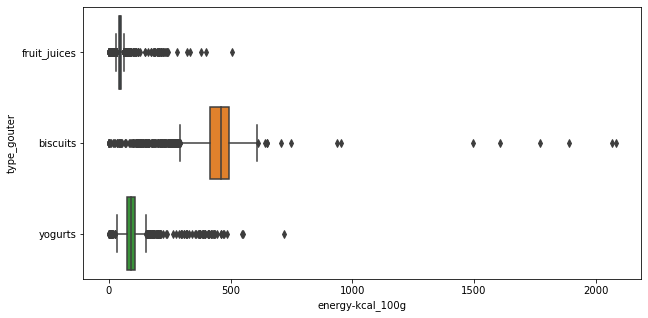

In [98]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "energy-kcal_100g", y = "type_gouter",data = dfN5, orient = 'h')
plt.show()

L'huile a 900 Kcal/100g, le beurre 745 kcal/100g.

Pour des valeurs supérieures à 745 kcal/100g, on va considérer qu'il faut faire la conversion kJ-kcal.

In [99]:
dfN6 = dfN5.copy()
for  val in dfN6["energy-kcal_100g"].loc[dfN6["type_gouter"]=="biscuits"] :
    #pour les valeurs de "energy-kcal_100g" chez "type_gouter" ="biscuits"
    if val >= 750 : #si valeur supérieure à 745
        dfN6["energy-kcal_100g"].loc[dfN6["type_gouter"]=="biscuits"] = (dfN6["energy-kcal_100g"].loc[
            dfN6["type_gouter"]=="biscuits"]).replace(val, int(val*0.2390))
        #faire la conversion kJ-kcal
dfN6[dfN6["type_gouter"]=="biscuits"].describe()

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
count,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,4722.000000,4722.000000,6523.000000
mean,446.063407,6.606702,59.435114,28.897688,19.860200,9.095924,0.246421,3.435620,0.186785,18.248965
std,73.119332,3.475373,11.727633,10.987274,7.270995,5.905577,0.491921,2.744463,0.393027,6.565357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,414.000000,5.300000,53.000000,24.000000,16.000000,3.600000,0.120000,2.000000,0.000000,15.000000
50%,460.000000,6.200000,61.000000,29.000000,21.000000,9.300000,0.212000,3.000000,0.000000,19.000000
75%,494.000000,7.300000,66.745000,35.000000,25.000000,14.000000,0.316000,5.000000,0.000000,23.000000
max,706.000000,80.000000,100.000000,78.000000,72.000000,120.000000,23.600000,26.000000,2.000000,34.000000


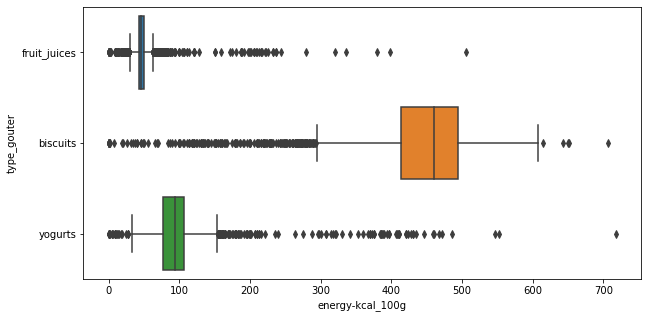

In [100]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "energy-kcal_100g", y = "type_gouter",data = dfN6, orient = 'h')
plt.show()

On va faire la même chose pour les fruit-juices (supérieur à 150 kcal) et yogurts (supérieur à 250 kcal).

In [101]:
dfN7 = dfN6.copy()
for  val in dfN7["energy-kcal_100g"].loc[dfN7["type_gouter"]=="yogurts"] :
    if val >= 250 :
        dfN7["energy-kcal_100g"].loc[dfN7["type_gouter"]=="yogurts"] = (dfN7["energy-kcal_100g"].loc[
            dfN7["type_gouter"]=="yogurts"]).replace(val, int(val*0.2390))

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [102]:
for  val in dfN7["energy-kcal_100g"].loc[dfN7["type_gouter"]=="fruit_juices"] :
    if val >= 150 :
        dfN7["energy-kcal_100g"].loc[dfN7["type_gouter"]=="fruit_juices"] = (dfN7["energy-kcal_100g"].loc[
            dfN7["type_gouter"]=="fruit_juices"]).replace(val, int(val*0.2390))
dfN7.describe()

,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
count,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,9062.000000,9062.000000,12919.000000
mean,260.688938,4.501436,35.440481,19.544714,11.110312,5.252998,0.155418,2.170271,0.097440,10.788141
std,195.569581,3.743035,25.820241,12.573798,10.463932,5.852512,0.740569,2.663157,0.298797,9.131995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,65.000000,2.500000,11.000000,10.000000,0.900000,0.300000,0.020000,0.000000,0.000000,3.000000
50%,178.000000,4.500000,23.100000,14.900000,6.900000,2.400000,0.056000,1.000000,0.000000,8.000000
75%,461.000000,6.300000,61.000000,29.415000,21.000000,9.420000,0.220000,4.000000,0.000000,19.000000
max,706.000000,80.000000,100.000000,78.000000,72.000000,120.000000,49.987200,26.000000,2.000000,34.000000


On va remplacer les valeurs nulles de "energy-kcal_100g" par la médiane dans chaque catégorie car la médiane est moins sensible aux outliers.

In [104]:
dfN8 = dfN7.copy()
for cat in l_gouter :
    for val in dfN8["energy-kcal_100g"].loc[dfN8['main_category'] == cat] :
        if val == 0 :
            dfN8["energy-kcal_100g"].loc[dfN8['main_category'] == cat] = dfN8["energy-kcal_100g"].loc[
            dfN8['main_category'] == cat].replace(0 , dfN8["energy-kcal_100g"].loc[
            dfN8['main_category'] == cat].median())

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


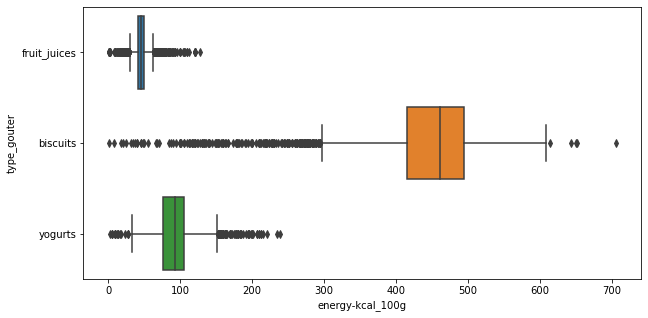

In [105]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "energy-kcal_100g", y = "type_gouter",data = dfN8, orient = 'h')
plt.show()

On va regarder les faibles valeurs de "energy-kcal_100g" chez les "biscuits"

In [106]:
dfN8.loc[(dfN8["type_gouter"]== "biscuits") & (dfN8["energy-kcal_100g"] <100)]

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
60,0025675015258,paskesz thin rice cake minis - plain,paskesz,en:puffed-rice-cakes,40.00,0.10000,15.00,0.00,0.00,0.000000,0.12000,NaN,NaN,1.0,biscuits
101,0043427777193,rice cakes,unknown,en:puffed-rice-cakes,70.00,1.00000,4.00,3.00,4.00,0.000000,0.00000,NaN,NaN,0.0,biscuits
118,0051500554975,cake mix,pillsbury,en:cakes,37.21,4.65000,81.40,39.53,4.65,1.162791,0.75608,NaN,NaN,17.0,biscuits
198,0072417170751,cookies,unknown,en:biscuits,66.00,5.50000,66.30,37.30,22.60,11.600000,0.24000,NaN,NaN,20.0,biscuits
384,03966404,prince,lu,en:filled-biscuits,45.00,6.40000,69.00,32.00,17.00,5.600000,0.23200,NaN,NaN,10.0,biscuits
489,0820213122760,krakus biscuits with chocolate strawberry,krakus,en:biscuits,90.00,1.00000,18.00,12.00,1.50,1.000000,0.01000,9.0,0.0,3.0,biscuits
783,2020008020136,cookies pepites de chocolat,unknown,en:chocolate-chip-cookies,1.00,5.50000,57.00,39.00,25.00,16.000000,0.16400,NaN,NaN,19.0,biscuits
839,2030331001382,cake aux fruits secs,unknown,en:fruit-cakes,34.00,7.00000,40.00,22.00,12.00,1.500000,0.16000,NaN,NaN,2.0,biscuits
3695,3256221178272,galettes de riz au chocolat noir,"u bio, u",en:puffed-rice-cakes-with-black-chocolate,84.00,6.60000,60.50,23.90,24.60,14.900000,0.00400,NaN,NaN,16.0,biscuits
3923,3256228674470,florentins aux amandes,unknown,en:biscuits,32.00,9.20000,61.00,42.00,25.00,10.000000,0.09200,NaN,NaN,19.0,biscuits


On va supprimer les valeurs pour lesquelles les biscuits ont une "energy-kcal_100g" < 10 et considérer que les valeurs <150 sont celles pour 1 biscuit (de poids moyen 20g) et donc mutliplier ces valeurs par 5 pour avoir la valeur pour 100g.

In [107]:
dfN9 = dfN8.drop(dfN8.loc[(dfN8["type_gouter"] == "biscuits") & (dfN8["energy-kcal_100g"] <10)].index)

In [108]:
for val in dfN9["energy-kcal_100g"].loc[dfN9["type_gouter"] == "biscuits"] :
    if val <=150 :
        dfN9["energy-kcal_100g"].loc[dfN9["type_gouter"] == "biscuits"] = dfN9["energy-kcal_100g"].loc[
        dfN9["type_gouter"] == "biscuits"].replace(val , val*5)
dfN9 = dfN9.reset_index(drop=True)

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


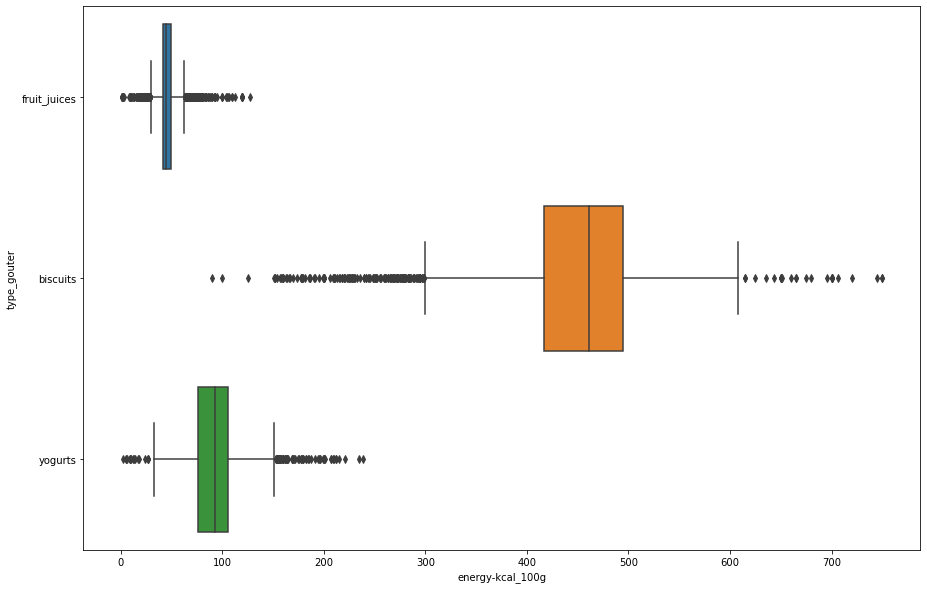

In [109]:
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "energy-kcal_100g", y = "type_gouter",data = dfN9, orient = 'h')
plt.show()

On va s'arrêter là pour "energy-kcal_100g".

In [110]:
dfN9.shape

(12917, 15)

### 4.5 Valeurs aberrantes dans "proteins_100g"

On va regarder les valeurs aberrantes en utilisant une répresentation en box-plot de "proteins_100g" selon  "type_gouter".

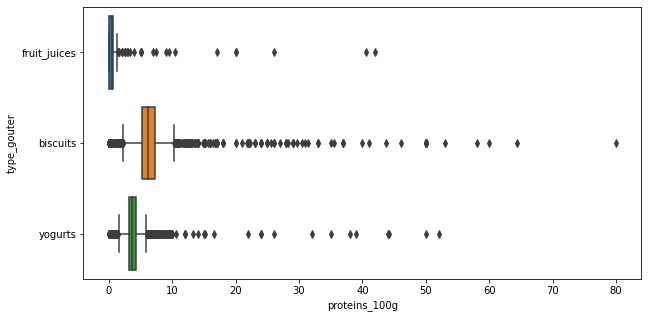

In [111]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "proteins_100g", y = "type_gouter",data = dfN9, orient = 'h')
plt.show()

La viande contient environ 25g de protéines pour 100g donc seuls des produits hyper protéinés en contiennent autant voir plus.

Regardons les valeurs hautes en "proteins_100g".

In [112]:
dfN9.loc[(dfN9["proteins_100g"] >20)]

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
229,00957328,greek yogurt 0%,trader joe's,en:greek-style-yogurts,122.5,22.0,7.00,6.00,0.00,0.0,0.070,NaN,NaN,-4.0,yogurts
309,0206093020332,moelleux chocolats,unknown,en:chocolate-cake-with-melting-centre,361.0,31.0,15.73,7.25,28.78,3.7,0.172,NaN,NaN,4.0,biscuits
418,0621498710822,pancake nature,unknown,en:pancakes,364.0,60.0,22.00,5.20,3.20,2.0,1.600,NaN,NaN,16.0,biscuits
454,0660989030674,biscuits morceaux d'orange,unknown,en:biscuits,477.0,29.0,40.80,17.40,21.60,10.3,0.416,NaN,NaN,22.0,biscuits
455,0660989030698,biscuits cacao noisette,qilibri,en:chocolate-biscuits,484.0,28.0,38.00,19.00,24.00,11.0,0.364,4.0,1.0,21.0,biscuits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,5999076222537,protein mug cake,bio tech usa,en:chocolate-cakes,399.0,46.0,35.00,11.00,8.30,4.4,0.640,NaN,NaN,17.0,biscuits
12288,5999076222544,pancake,protein gusto,en:pancakes,394.0,53.0,35.00,13.00,4.60,2.0,0.520,4.0,0.0,12.0,biscuits
12289,5999076222551,pancake,biotechusa,en:pancakes,385.0,50.0,34.00,11.00,5.20,2.4,0.520,NaN,NaN,13.0,biscuits
12290,5999100006515,protein muffin,scitec nutrition,en:cakes,433.0,22.0,36.00,3.30,23.00,19.0,0.432,6.0,0.0,14.0,biscuits


On trouve dedans des produits hyper protéinés, donc on va supprimer les valeurs pour lesquelles on a au moins 20g de protéines

In [113]:
dfN10 = dfN9.drop(dfN9.loc[(dfN9["proteins_100g"] >=20) ].index)
dfN10.reset_index(drop=True)
dfN10.shape

(12841, 15)

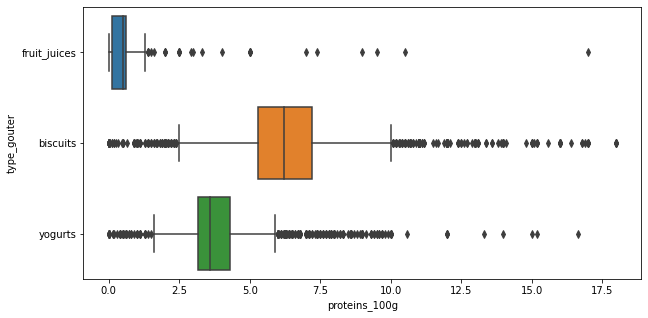

In [115]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "proteins_100g", y = "type_gouter",data = dfN10, orient = 'h')
plt.show()

On va supprimer les fruits-juices avec plus de 2g de protéines.

In [116]:
dfN11 = dfN10.drop(dfN10.loc[(dfN10["proteins_100g"] >2) & (dfN10["type_gouter"] == "fruit_juices")].index)
dfN11 = dfN11.reset_index(drop=True)
dfN11.shape

(12823, 15)

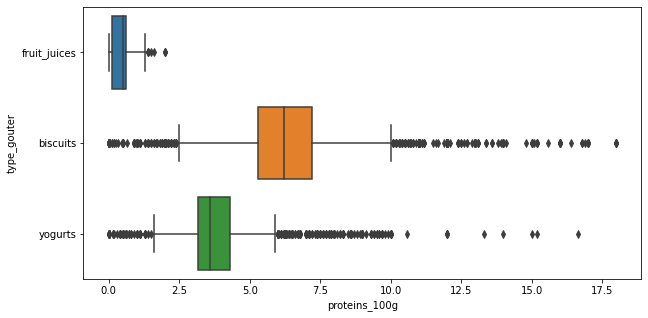

In [117]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "proteins_100g", y = "type_gouter",data = dfN11, orient = 'h')
plt.show()

On va s'arrêter là pour "proteins_100g".

### 4.6 Valeurs aberrantes dans "fat_100g"

On va regarder les valeurs aberrantes en utilisant une répresentation en box-plot de "fat_100g" selon  "type_gouter".

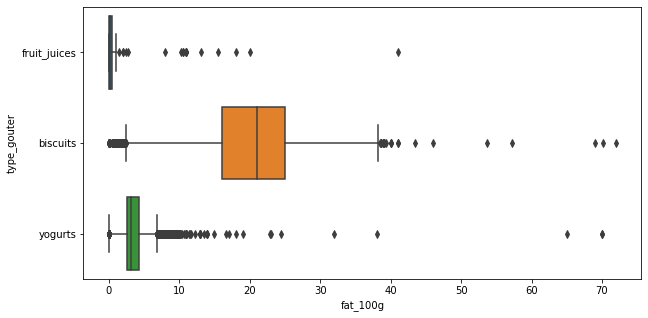

In [118]:
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x= "fat_100g", y = "type_gouter",data = dfN11, orient = 'h')
plt.show()

Il y a des "fruit_juices" avec matières grasses => aberrant, on va supprimer des valeurs > 4g, de même pour les "yogurts" à plus de 15g.

In [119]:
dfN12 = dfN11.drop(dfN11.loc[(dfN11["fat_100g"] >4) & (dfN11["type_gouter"] == "fruit_juices")].index)
dfN12 = dfN12.reset_index(drop=True)
dfN12.shape

(12810, 15)

In [120]:
dfN12 = dfN12.drop(dfN12.loc[(dfN12["fat_100g"] >15) & (dfN12["type_gouter"] == "yogurts")].index)
dfN12 = dfN12.reset_index(drop=True)
dfN12.shape

(12798, 15)

On va supprimer les produits avec plus de 45g de "fat_100g".

In [121]:
dfN12 = dfN12.drop(dfN12.loc[(dfN12["fat_100g"] > 45)].index)
dfN12 = dfN12.reset_index(drop=True)
dfN12.shape

(12792, 15)

In [122]:
dfN12.describe()

,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
count,12792.000000,12792.000000,12792.000000,12792.000000,12792.000000,12792.000000,12792.000000,8994.000000,8994.000000,12792.000000
mean,263.423923,4.323400,35.573215,19.639710,11.063368,5.245940,0.153424,2.167111,0.096286,10.809881
std,196.350157,2.787266,25.870352,12.574947,10.379624,5.837171,0.740534,2.661692,0.297253,9.140567
min,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,66.000000,2.500000,11.000000,10.000000,0.900000,0.300000,0.020000,0.000000,0.000000,3.000000
50%,230.000000,4.500000,25.000000,15.000000,6.800000,2.400000,0.056000,1.000000,0.000000,8.000000
75%,463.000000,6.300000,61.000000,29.625000,21.000000,9.410000,0.220000,3.000000,0.000000,20.000000
max,750.000000,18.000000,100.000000,78.000000,43.400000,120.000000,49.987200,26.000000,2.000000,34.000000


On remarque que le maximum de "saturated-fat_100g" est supérieur au maximum de "fat_100g", ceci est aberrant.

On va supprimer les lignes où "saturated-fat_100g" > "fat_100g".

In [123]:
dfN13 = dfN12.drop(dfN12.loc[(dfN12["fat_100g"] < dfN12["saturated-fat_100g"])].index)
dfN13 = dfN13.reset_index(drop=True)
dfN13.shape

(12778, 15)

On va s'arrêter là pour l'instant.

### 4.7 Valeurs aberrantes dans "carbohydrates_100g"

On supprimer les lignes où la valeur en "carbohydrates_100g" est inférieure à celle en "sugars_100g" car ceci est aberrant.

In [124]:
dfN14 = dfN13.drop(dfN13.loc[(dfN13["carbohydrates_100g"] < dfN13["sugars_100g"])].index)
dfN14 = dfN14.reset_index(drop=True)
dfN14.shape

(12776, 15)

### 4.8 Valeurs aberrantes selon "main_category"

Si on regarde le box plot représentant "energy-kcal_100g selon les valeurs de "main_category" chez les "type_gouter" "biscuits", on voit une certaine disparité.

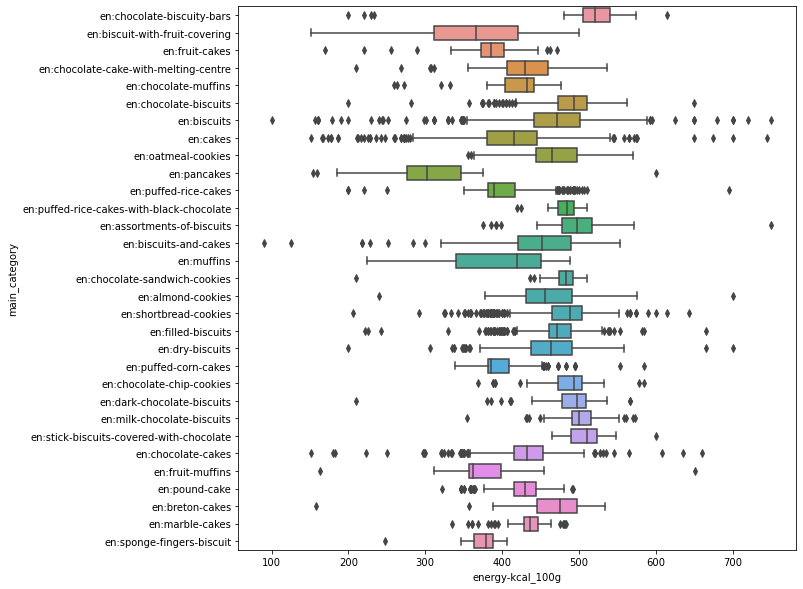

In [128]:
f,ax = plt.subplots(figsize = (10,10))
sns.boxplot(x= "energy-kcal_100g", y = "main_category",data = dfN14.loc[(dfN14["type_gouter"] == 'biscuits')]
            , orient = 'h')
plt.show()

On va regarder la distribution de "energy-kcal" chez certaines "main_category" : en:muffins et en:cakes.

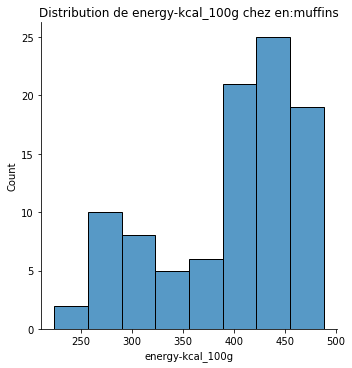

In [136]:
sns.displot(x = "energy-kcal_100g",data = dfN14.loc[(dfN14["main_category"] == 'en:muffins')])
plt.title("Distribution de energy-kcal_100g chez en:muffins" )
plt.show()

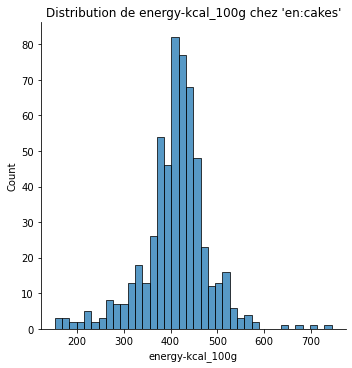

In [137]:
sns.displot(x = "energy-kcal_100g",data = dfN14.loc[(dfN14["main_category"] == 'en:cakes')])
plt.title("Distribution de energy-kcal_100g chez 'en:cakes'" )
plt.show()

On voit que les box-plots ne traduisent pas la tendance à la bimodalité pour certaines "main_category". 

Mais comme :
-  on n'est pas tout à fait sûre de la qualité des données (malgré nettoyage et cleanage) 
- on ne peut pas rentrer dans le détail pour les 70 "main_category" 
- on ne peut pas traiter les "type_gouter" globalement

on va donc décider de supprimer les valeurs aberrantes 
- inférieures à Q1 - 2xIQR 
- supérieures à Q3 + 2xIQR.

Les valeurs à Q1 - 1.5xIQR et Q3 + 1.5xIQR sont celles des limites inférieures et supérieures des "moustaches" du box plot. En choisissant 2xIQR, cela nous permet d'avoir quelques outliers.

In [149]:
# fonction qui retourne un dataframe dans lequel on a supprimé les outliers
# prend en paramètre un dataframe df_in et une colonne col_name sur laquelle supprimer les outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #calcul de q1
    q3 = df_in[col_name].quantile(0.75) #calcul de q3
    iqr = q3-q1 #Interquartile range 
    fence_low  = max(0,q1-2*iqr) #valeur inférieure, on prend le maximum entre 0 et q1-2*iqr 
                                    #pour éviter les valeurs négatives
    fence_high = q3+2*iqr #valeur supérieure
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [150]:
# fonction qui retourne un dataframe dans lequel on a supprimé les outliers selon les valeurs d'une colonne
# de tri
# prend en paramètre un dataframe df_in, la colonne de tri col_tri 
# et une colonne col_name sur laquelle supprimer les outliers

def rem(df_in, col_tri,col_name) :
    # création d'un data frame vide
    df_out = pd.DataFrame(columns = df_in.columns)
    
    for cat in df_in[col_tri].unique() : #selon valeur dans la colonne "tri"
        df_tri = df_in.loc[(df_in[col_tri] == cat)] # sous dataframe "tri"
        df_out = pd.concat([df_out,remove_outlier(df_tri, col_name)]) #ajout du dataframe "tri" cleané
    df_out = df_out.reset_index(drop=True) 
    return df_out

On va appliquer ce filtre sur les colonnes numériques suivantes :

In [151]:
col_num = ['energy-kcal_100g','proteins_100g','carbohydrates_100g','sugars_100g',
          'fat_100g','saturated-fat_100g','sodium_100g']

In [152]:
#fonction qui retourne un dataframe dans lequel on a supprimé les outliers selon les valeurs d'une colonne de tri
# prend en paramètre un dataframe df_in, la colonne de tri col_tri 

def rem_outlier(df_in,col_tri) :
    # création d'une copy du data frame initial
    df_out = df_in.copy()
    for col_target in col_num : #pour chaque colonne "numérique"
        df_out = rem(df_out, col_tri, col_target) #appel du dataframe "tri" cleané rem(df_in, col_tri,col_name)
    df_out = df_out.reset_index(drop=True) 
    return df_out

In [155]:
dfN15 = rem_outlier(dfN14, "main_category")

On va vérifier que la suppression des outliers a bien été faite en affichant les box plots :

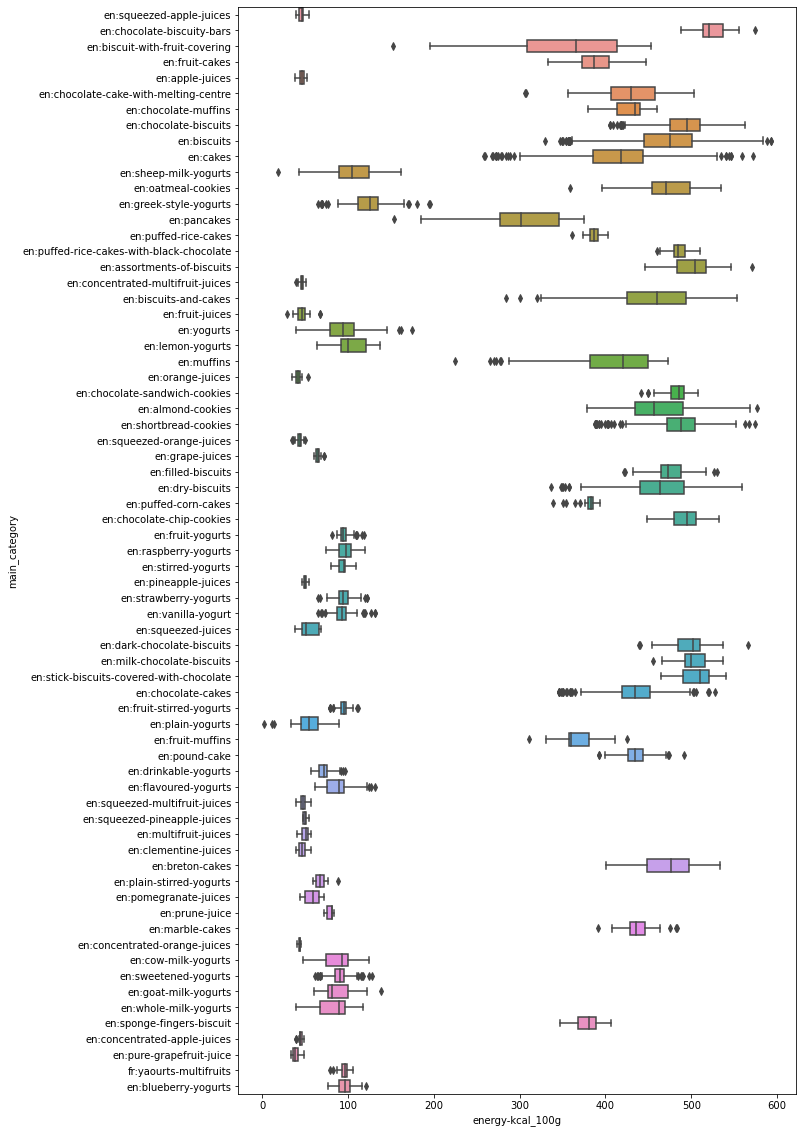

In [156]:
f,ax = plt.subplots(figsize = (10,20))
sns.boxplot(x= "energy-kcal_100g", y = "main_category",data = dfN15, orient = 'h')
plt.show()

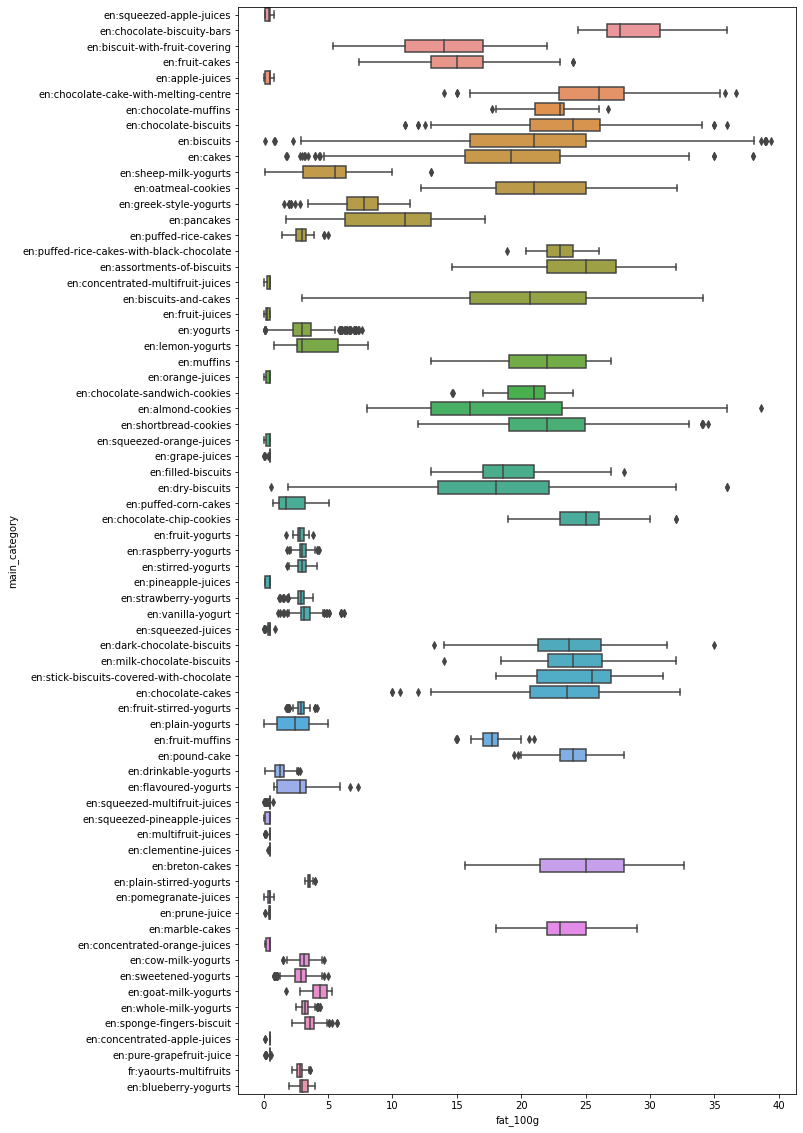

In [158]:
f,ax = plt.subplots(figsize = (10,20))
sns.boxplot(x= "fat_100g", y = "main_category",data = dfN15, orient = 'h')
plt.show()

La fonction de filtrage a bien été appliquée.

In [159]:
dfN15.shape

(8344, 15)

On a supprimé 35%. 

Explications possibles :
- on a fait ce filtrage pour chaque colonne numérique citée au-dessus et selon chaque "main_category" 
- qualité des données ?

In [160]:
dfN15.describe()

,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g
count,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,6107.000000,6107.000000,8344.000000
mean,324.793482,5.200231,43.164333,23.097049,14.246962,6.758697,0.162840,2.611430,0.125102,13.263782
std,183.967180,2.121170,24.911660,12.125464,9.967594,5.815759,0.139964,2.684371,0.332836,9.195823
min,2.000000,0.010000,2.000000,0.100000,0.010000,0.000100,0.000160,0.000000,0.000000,-6.000000
25%,97.000000,3.700000,13.300000,12.200000,3.300000,1.900000,0.040000,0.000000,0.000000,3.000000
50%,422.000000,5.400000,54.000000,25.000000,16.100000,4.400000,0.120000,2.000000,0.000000,15.000000
75%,482.000000,6.600000,63.600000,32.000000,23.000000,12.000000,0.252000,4.000000,0.000000,22.000000
max,593.000000,13.400000,88.200000,66.000000,39.400000,31.000000,0.756000,20.000000,2.000000,31.000000


## 5. Imputations des colonnes "additives_n" et "ingredients_from_palm_oil_n"

Voyons le nombre de valeurs manquantes dans ces colonnes :

In [161]:
per_missing(dfN15)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    26.809684
ingredients_from_palm_oil_n    26.809684
nutrition-score-fr_100g         0.000000
type_gouter                     0.000000
dtype: float64

Comme on va travailler avec des sous-dataset (selon valeur dans "main_category" ou "type_gouter"), on va créer une fonction pour créer ce sous dataset :

In [162]:
# Fonction qui retourne un sous-dataset à partir d'un data set df_in, selon une valeur val 
# de la colonne col_tri
def df_filt(df_in,col_tri, val) :
    df_out = df_in.loc[df_in[col_tri]== val]
    
    return df_out.reset_index(drop=True)

On va créer de suite nos sous-datasets dfB, dfY et dfJ selon le 'type_gouter'

In [163]:
dfB = df_filt(dfN15,'type_gouter', 'biscuits')
dfB.shape

(5397, 15)

In [164]:
dfY = df_filt(dfN15,'type_gouter', 'yogurts')
dfY.shape

(2405, 15)

In [165]:
dfJ = df_filt(dfN15,'type_gouter', 'fruit_juices')
dfJ.shape

(542, 15)

On va regarder si le % de valeurs manquantes est le même dans ces sous-datasets :

In [166]:
per_missing(dfB)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    25.680934
ingredients_from_palm_oil_n    25.680934
nutrition-score-fr_100g         0.000000
type_gouter                     0.000000
dtype: float64

In [167]:
per_missing(dfY)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    26.237006
ingredients_from_palm_oil_n    26.237006
nutrition-score-fr_100g         0.000000
type_gouter                     0.000000
dtype: float64

In [168]:
per_missing(dfJ)

code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                    40.590406
ingredients_from_palm_oil_n    40.590406
nutrition-score-fr_100g         0.000000
type_gouter                     0.000000
dtype: float64

A peu près le même nombre pour "biscuits" et "yogurts" (environ 26%), plus pour les "fruit_juices".

### 5.1 Imputations de la colonne "additives_n"

#### a. Imputation par kNN

Cette méthode permet d'imputer des valeurs manquantes en se basant sur les valeurs des plus proches voisins.

On va d'abord récupérer un jeu de données sans valeur manquante.

In [169]:
dfA = dfN15[dfN15["additives_n"].notna()]
dfA.shape

(6107, 15)

On va d'abord entrainer le modèle de kNN, puis trouver la valeur optimale de k et ensuite faire une imputation sur la colonne cible.

On va splitter les data sans valeur nulle en 3 data set selon "type_gouter".

In [170]:
dfBA = df_filt(dfA,'type_gouter', 'biscuits')
dfBA.shape

(4011, 15)

In [171]:
dfYA = df_filt(dfA,'type_gouter', 'yogurts')
dfYA.shape

(1774, 15)

In [172]:
dfJA = df_filt(dfA,'type_gouter', 'fruit_juices')
dfJA.shape

(322, 15)

On va définir les fonctions utiles pour le kNN : 

In [173]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors

#fonction qui retourne un array X à partir du dataframe df et sur les colonnes choisies dans la fonction
#cet array servira d'input pour le kNN
#prend en paramètre le dataframe df
def f_X(df) :
    X = df[['energy-kcal_100g','proteins_100g','carbohydrates_100g','sugars_100g',
          'fat_100g','saturated-fat_100g','sodium_100g']].values
    return X

#fonction qui retourne un array Y sur la colonne dont on veut faire la prédiction de valeur
#prend en paramètre le dataframe df et la colonne à prédire predicted
def f_y(df, predicted) :
    y = df[predicted].values
    return y

#fonction qui retourne un graphe montrant l'erreur du k-NN en fonction de la valeur de k
#elle applique le kNN
#prend en paramètre le dataframe df, l'array input fit, l'array à prédire predicted et le nombre de valeurs
#de k que l'on souhaite tester n_max
def knn_f(df,fit,predicted,n_max) :
    #on normalise des données d'entrée par centrage-réduction
    fit = preprocessing.StandardScaler().fit(fit).transform(fit.astype(float)) 
    #on splitte les données en dataset d'entrainement et de test, avec 80% des data dans le dataset entrainement
    xtrain, xtest, ytrain, ytest = train_test_split(fit, predicted, train_size=0.8)
    
    errors = []
    for k in range(1,n_max):
        knn = neighbors.KNeighborsClassifier(k)#on effectue un kNN pour chaque valeur de k
        #on stocke dans la liste errors les erreurs (en %) fait sur le dataset de test
        #en ayant entrainé le modèle sur le dataset d'entrainement
        errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
    plt.plot(range(1,n_max), errors, 'o-')
    plt.title("% d'erreurs du k-NN selon k")
    plt.xlabel("k")
    plt.ylabel("% d'erreurs")
    plt.show()

On va effectuer le kNN sur les sous-datasets :

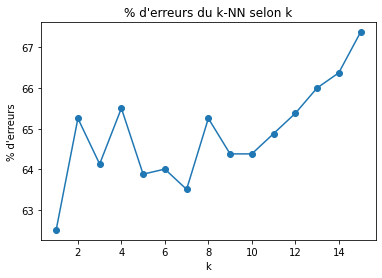

In [174]:
#biscuits
knn_f(dfBA,f_X(dfBA),f_y(dfBA, "additives_n"),16)

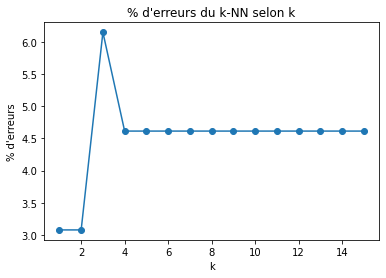

In [179]:
knn_f(dfJA,f_X(dfJA,),f_y(dfJA, "additives_n"),16)

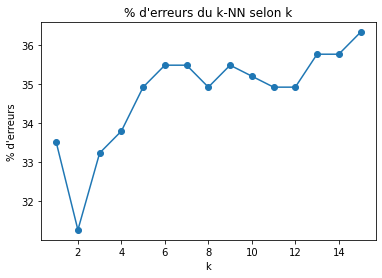

In [177]:
knn_f(dfYA,f_X(dfYA,),f_y(dfYA, "additives_n"),16)

Le pourcentage d'erreur est trop élevé pour les "biscuits" et "yogurts" (60-66%) et (32-38%).

Par contre, pour les "fruits_juices", l'erreur est faible (3-6%), on va donc faire une imputation par kNN.

In [180]:
from sklearn.impute import KNNImputer

#fonction qui retourne un dataframe où les Nan d'une colonne ont été imputés par la valeur trouvée par kNN
#prend en paramètre le dataframe df_in, la colonne où faire l'imputation col_targ et la valeur de k choisie n

def imput(df_in,col_targ, n) :
    X = df_in[[col_targ]].values #array de la colonne cible
    imputer = KNNImputer(n_neighbors=n) #définition  de l'instance imputer
    imputed = imputer.fit_transform(X).astype(int) 
    #array des valeurs imputées à partir de l'array X, en convertissant en integer
    for indx, val in df_in.iterrows() :
        if math.isnan(df_in[col_targ].iloc[indx]) == True : #si dans la colonne du dataframe, il y a un NaN
            df_in[col_targ].iloc[indx] = imputed[indx] #on remplace par la valeur imputée
    return df_in

In [181]:
df_Jclean = imput(dfJ, "additives_n", 1)
per_missing(df_Jclean)

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


code                            0.000000
product_name                    0.000000
brands                          0.000000
main_category                   0.000000
energy-kcal_100g                0.000000
proteins_100g                   0.000000
carbohydrates_100g              0.000000
sugars_100g                     0.000000
fat_100g                        0.000000
saturated-fat_100g              0.000000
sodium_100g                     0.000000
additives_n                     0.000000
ingredients_from_palm_oil_n    40.590406
nutrition-score-fr_100g         0.000000
type_gouter                     0.000000
dtype: float64

In [190]:
#affichage du dataframe
df_Jclean

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,00472821,pressed pink lady apple juice,marks & spencer,en:squeezed-apple-juices,51.0,0.40,11.7,10.8,0.20,0.100,0.0120,0.0,NaN,6.0,fruit_juices
1,05017231,jus de pomme,solevita,en:squeezed-apple-juices,47.0,0.10,11.0,10.5,0.10,0.100,0.0040,0.0,NaN,4.0,fruit_juices
2,0569831001070,jus de pomme pur jus de provence,unknown,en:squeezed-apple-juices,44.0,0.17,10.0,9.6,0.14,0.046,0.0052,0.0,NaN,4.0,fruit_juices
3,1307504440004,pur jus pomme de provence,unknown,en:squeezed-apple-juices,48.0,0.50,12.0,11.0,0.50,0.100,0.0080,0.0,NaN,5.0,fruit_juices
4,15673367,pur jus artisanal de pomme,unknown,en:squeezed-apple-juices,52.0,0.50,13.0,11.5,0.50,0.100,0.0040,0.0,NaN,6.0,fruit_juices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,3760002691312,pamplemousse rose pur jus,jean-louis bissardon,en:pure-grapefruit-juice,36.0,0.70,7.7,7.7,0.21,0.030,0.0020,0.0,NaN,2.0,fruit_juices
538,3760125983073,pur jus de pamplemousse rose,unknown,en:pure-grapefruit-juice,40.0,0.50,9.2,7.6,0.50,0.100,0.0040,0.0,NaN,2.0,fruit_juices
539,3760159101368,jus de pamplemousse,"très pressés,la compagnie fraiche",en:pure-grapefruit-juice,42.0,0.70,9.0,8.1,0.50,0.100,0.0040,0.0,0.0,2.0,fruit_juices
540,3760186970050,pamplemousse rose 100% pur jus,force bio,en:pure-grapefruit-juice,37.0,0.50,7.6,7.6,0.50,0.100,0.0040,0.0,0.0,2.0,fruit_juices


Pour biscuits et yogurts, on va imputer par la médiane, selon la valeur de "main_category"

In [182]:
# fonction qui impute les valeurs manquantes de la colonne col_nan par la médiane 
# dans un dataframe df_in, selon la valeur de la colonne col_tri
# retourne le dataframe "rempli"
# prend en paramètre le dataframe df_in, col_tri et col_nana

def imput_by_med(df_in, col_tri, col_nan) :
    df_out = pd.DataFrame(columns = df_in.columns)
    for cat in df_in[col_tri].unique() :
        dfX = df_in.loc[(df_in[col_tri]==cat)]
        dfX.loc[dfX[col_nan].isna(),col_nan]= int(dfX[col_nan].median()) #valeur entière de la médiane
        df_out = pd.concat([df_out,dfX])
    df_out = df_out.reset_index(drop=True)
    return df_out

In [183]:
#Affichage de df des biscuits initital pour voir si imputation se fait correctement
dfB

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0059800501453,kit kat thé vert,nestlé,en:chocolate-biscuity-bars,542.857143,5.714286,57.142857,40.0,31.428571,22.857143,0.100,NaN,NaN,25.0,biscuits
1,26028729,"gaufrettes cacao,noix de coco et glaçage cacao...",mes p'tits secrets,en:chocolate-biscuity-bars,574.000000,4.400000,56.000000,43.0,36.000000,17.000000,0.068,3.0,1.0,26.0,biscuits
2,3770009551052,ze-twins,thierry court,en:chocolate-biscuity-bars,498.000000,7.000000,53.000000,33.0,28.000000,15.000000,0.172,1.0,0.0,24.0,biscuits
3,3800020410929,kit kat chucky new york cheesecake,nestlé,en:chocolate-biscuity-bars,535.000000,9.700000,55.700000,48.9,30.100000,17.100000,0.108,NaN,NaN,27.0,biscuits
4,3800020410998,kit kat chunky mix,nestlé,en:chocolate-biscuity-bars,539.000000,7.200000,58.000000,51.3,30.600000,17.100000,0.092,NaN,NaN,27.0,biscuits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5400247031297,savoiardi,winny,en:sponge-fingers-biscuit,382.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits
5393,5901583331169,boudoirs,caprisse,en:sponge-fingers-biscuit,378.000000,7.400000,80.000000,48.0,2.800000,0.700000,0.160,2.0,0.0,15.0,biscuits
5394,8001703101249,boudoirs à la farine d'épeautre,actibio,en:sponge-fingers-biscuit,384.000000,7.560000,81.970000,42.0,2.830000,1.000000,0.100,2.0,0.0,14.0,biscuits
5395,8002720003103,boudoirs savoiardi,bonomi,en:sponge-fingers-biscuit,378.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits


In [184]:
#on applique la fonction
df_Bclean = imput_by_med(dfB,"main_category","additives_n")
df_Bclean

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0059800501453,kit kat thé vert,nestlé,en:chocolate-biscuity-bars,542.857143,5.714286,57.142857,40.0,31.428571,22.857143,0.100,2.0,NaN,25.0,biscuits
1,26028729,"gaufrettes cacao,noix de coco et glaçage cacao...",mes p'tits secrets,en:chocolate-biscuity-bars,574.000000,4.400000,56.000000,43.0,36.000000,17.000000,0.068,3.0,1.0,26.0,biscuits
2,3770009551052,ze-twins,thierry court,en:chocolate-biscuity-bars,498.000000,7.000000,53.000000,33.0,28.000000,15.000000,0.172,1.0,0.0,24.0,biscuits
3,3800020410929,kit kat chucky new york cheesecake,nestlé,en:chocolate-biscuity-bars,535.000000,9.700000,55.700000,48.9,30.100000,17.100000,0.108,2.0,NaN,27.0,biscuits
4,3800020410998,kit kat chunky mix,nestlé,en:chocolate-biscuity-bars,539.000000,7.200000,58.000000,51.3,30.600000,17.100000,0.092,2.0,NaN,27.0,biscuits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5400247031297,savoiardi,winny,en:sponge-fingers-biscuit,382.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits
5393,5901583331169,boudoirs,caprisse,en:sponge-fingers-biscuit,378.000000,7.400000,80.000000,48.0,2.800000,0.700000,0.160,2.0,0.0,15.0,biscuits
5394,8001703101249,boudoirs à la farine d'épeautre,actibio,en:sponge-fingers-biscuit,384.000000,7.560000,81.970000,42.0,2.830000,1.000000,0.100,2.0,0.0,14.0,biscuits
5395,8002720003103,boudoirs savoiardi,bonomi,en:sponge-fingers-biscuit,378.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits


Les NaN de la colonne additives_n ont bien été remplacés.

On va faire de même avec les dataframes des yogurts et fruit_juices.

In [187]:
dfY

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0002000000714,yaourt nature brebis,la bergerie,en:sheep-milk-yogurts,44.0,6.3,4.3,3.6,0.1,0.07,0.0520,0.0,0.0,-3.0,yogurts
1,0002000002336,yaourt de brebis vanille,naturalia,en:sheep-milk-yogurts,85.0,5.0,10.0,8.0,2.8,2.10,0.0400,0.0,0.0,1.0,yogurts
2,0200121007814,yaourt nature brebis,unknown,en:sheep-milk-yogurts,67.0,5.5,4.4,3.0,3.0,2.20,0.0520,NaN,NaN,-1.0,yogurts
3,0205853005619,yaourt de brebis,unknown,en:sheep-milk-yogurts,92.0,4.9,5.6,1.7,5.6,3.80,0.0400,NaN,NaN,4.0,yogurts
4,0205853007217,yaourt brassé sur lit de pêche abricot au lait...,unknown,en:sheep-milk-yogurts,130.0,3.8,18.0,17.0,4.7,2.90,0.0320,NaN,NaN,4.0,yogurts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,3760267350023,yaourt fermier myrtille,la ferme marty-debat,en:blueberry-yogurts,113.0,3.7,18.0,15.3,2.7,1.50,0.0400,NaN,NaN,3.0,yogurts
2401,3770000451115,yaourt fermier myrtille sauvage,les p’tits fermiers,en:blueberry-yogurts,99.0,3.3,12.5,12.0,3.6,2.30,0.0440,NaN,NaN,3.0,yogurts
2402,3770000451764,yaourts à la myrtille sauvage,invitation a la ferme,en:blueberry-yogurts,97.0,3.4,11.8,11.3,3.6,2.30,0.0468,1.0,0.0,3.0,yogurts
2403,3770011182060,yaourt brassé myrtille,unknown,en:blueberry-yogurts,91.0,3.2,12.0,11.8,3.4,2.00,0.0400,NaN,NaN,3.0,yogurts


In [188]:
df_Yclean = imput_by_med(dfY,"main_category","additives_n")
df_Yclean

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0002000000714,yaourt nature brebis,la bergerie,en:sheep-milk-yogurts,44.0,6.3,4.3,3.6,0.1,0.07,0.0520,0.0,0.0,-3.0,yogurts
1,0002000002336,yaourt de brebis vanille,naturalia,en:sheep-milk-yogurts,85.0,5.0,10.0,8.0,2.8,2.10,0.0400,0.0,0.0,1.0,yogurts
2,0200121007814,yaourt nature brebis,unknown,en:sheep-milk-yogurts,67.0,5.5,4.4,3.0,3.0,2.20,0.0520,0.0,NaN,-1.0,yogurts
3,0205853005619,yaourt de brebis,unknown,en:sheep-milk-yogurts,92.0,4.9,5.6,1.7,5.6,3.80,0.0400,0.0,NaN,4.0,yogurts
4,0205853007217,yaourt brassé sur lit de pêche abricot au lait...,unknown,en:sheep-milk-yogurts,130.0,3.8,18.0,17.0,4.7,2.90,0.0320,0.0,NaN,4.0,yogurts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,3760267350023,yaourt fermier myrtille,la ferme marty-debat,en:blueberry-yogurts,113.0,3.7,18.0,15.3,2.7,1.50,0.0400,1.0,NaN,3.0,yogurts
2401,3770000451115,yaourt fermier myrtille sauvage,les p’tits fermiers,en:blueberry-yogurts,99.0,3.3,12.5,12.0,3.6,2.30,0.0440,1.0,NaN,3.0,yogurts
2402,3770000451764,yaourts à la myrtille sauvage,invitation a la ferme,en:blueberry-yogurts,97.0,3.4,11.8,11.3,3.6,2.30,0.0468,1.0,0.0,3.0,yogurts
2403,3770011182060,yaourt brassé myrtille,unknown,en:blueberry-yogurts,91.0,3.2,12.0,11.8,3.4,2.00,0.0400,1.0,NaN,3.0,yogurts


### 5.2  ingredients_from_palm_oil_n

On regarde les valeurs prises dans la colonne "ingredients_from_palm_oil_n".

In [206]:
df_Bclean['ingredients_from_palm_oil_n'].value_counts()

0.0    3251
1.0     756
2.0       4
Name: ingredients_from_palm_oil_n, dtype: int64

In [207]:
df_Yclean['ingredients_from_palm_oil_n'].value_counts()

0.0    1774
Name: ingredients_from_palm_oil_n, dtype: int64

In [208]:
df_Jclean['ingredients_from_palm_oil_n'].value_counts()

0.0    322
Name: ingredients_from_palm_oil_n, dtype: int64

Aucun 'ingredients_from_palm_oil_n' chez les "fruit_juices" et les "yogurts", donc on va remplacer les valeurs manquantes par 0.

In [209]:
df_Yclean2 = df_Yclean.fillna(0)
df_Jclean2 = df_Jclean.fillna(0)

In [210]:
per_missing(df_Jclean2)

code                           0.0
product_name                   0.0
brands                         0.0
main_category                  0.0
energy-kcal_100g               0.0
proteins_100g                  0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
sodium_100g                    0.0
additives_n                    0.0
ingredients_from_palm_oil_n    0.0
nutrition-score-fr_100g        0.0
type_gouter                    0.0
dtype: float64

In [211]:
per_missing(df_Yclean2)

code                           0.0
product_name                   0.0
brands                         0.0
main_category                  0.0
energy-kcal_100g               0.0
proteins_100g                  0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
sodium_100g                    0.0
additives_n                    0.0
ingredients_from_palm_oil_n    0.0
nutrition-score-fr_100g        0.0
type_gouter                    0.0
dtype: float64

Pour les "biscuits", on va regarder déjà le knn.

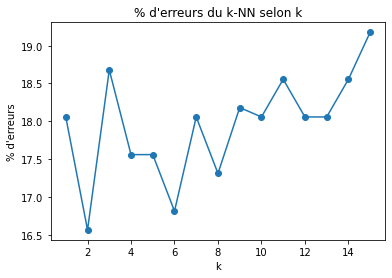

In [198]:
knn_f(dfBA,f_X(dfBA),f_y(dfBA, "ingredients_from_palm_oil_n"),16)

Entre 16.5 et 19.5% d'erreur, un peu élevé. On va donc remplacer les NaN par la valeur médiane dans chaque "main_category".

In [199]:
df_Bclean

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0059800501453,kit kat thé vert,nestlé,en:chocolate-biscuity-bars,542.857143,5.714286,57.142857,40.0,31.428571,22.857143,0.100,2.0,NaN,25.0,biscuits
1,26028729,"gaufrettes cacao,noix de coco et glaçage cacao...",mes p'tits secrets,en:chocolate-biscuity-bars,574.000000,4.400000,56.000000,43.0,36.000000,17.000000,0.068,3.0,1.0,26.0,biscuits
2,3770009551052,ze-twins,thierry court,en:chocolate-biscuity-bars,498.000000,7.000000,53.000000,33.0,28.000000,15.000000,0.172,1.0,0.0,24.0,biscuits
3,3800020410929,kit kat chucky new york cheesecake,nestlé,en:chocolate-biscuity-bars,535.000000,9.700000,55.700000,48.9,30.100000,17.100000,0.108,2.0,NaN,27.0,biscuits
4,3800020410998,kit kat chunky mix,nestlé,en:chocolate-biscuity-bars,539.000000,7.200000,58.000000,51.3,30.600000,17.100000,0.092,2.0,NaN,27.0,biscuits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5400247031297,savoiardi,winny,en:sponge-fingers-biscuit,382.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits
5393,5901583331169,boudoirs,caprisse,en:sponge-fingers-biscuit,378.000000,7.400000,80.000000,48.0,2.800000,0.700000,0.160,2.0,0.0,15.0,biscuits
5394,8001703101249,boudoirs à la farine d'épeautre,actibio,en:sponge-fingers-biscuit,384.000000,7.560000,81.970000,42.0,2.830000,1.000000,0.100,2.0,0.0,14.0,biscuits
5395,8002720003103,boudoirs savoiardi,bonomi,en:sponge-fingers-biscuit,378.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits


In [200]:
df_Bclean2 = imput_by_med(df_Bclean, "main_category", "ingredients_from_palm_oil_n")
df_Bclean2

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter
0,0059800501453,kit kat thé vert,nestlé,en:chocolate-biscuity-bars,542.857143,5.714286,57.142857,40.0,31.428571,22.857143,0.100,2.0,0.0,25.0,biscuits
1,26028729,"gaufrettes cacao,noix de coco et glaçage cacao...",mes p'tits secrets,en:chocolate-biscuity-bars,574.000000,4.400000,56.000000,43.0,36.000000,17.000000,0.068,3.0,1.0,26.0,biscuits
2,3770009551052,ze-twins,thierry court,en:chocolate-biscuity-bars,498.000000,7.000000,53.000000,33.0,28.000000,15.000000,0.172,1.0,0.0,24.0,biscuits
3,3800020410929,kit kat chucky new york cheesecake,nestlé,en:chocolate-biscuity-bars,535.000000,9.700000,55.700000,48.9,30.100000,17.100000,0.108,2.0,0.0,27.0,biscuits
4,3800020410998,kit kat chunky mix,nestlé,en:chocolate-biscuity-bars,539.000000,7.200000,58.000000,51.3,30.600000,17.100000,0.092,2.0,0.0,27.0,biscuits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5400247031297,savoiardi,winny,en:sponge-fingers-biscuit,382.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits
5393,5901583331169,boudoirs,caprisse,en:sponge-fingers-biscuit,378.000000,7.400000,80.000000,48.0,2.800000,0.700000,0.160,2.0,0.0,15.0,biscuits
5394,8001703101249,boudoirs à la farine d'épeautre,actibio,en:sponge-fingers-biscuit,384.000000,7.560000,81.970000,42.0,2.830000,1.000000,0.100,2.0,0.0,14.0,biscuits
5395,8002720003103,boudoirs savoiardi,bonomi,en:sponge-fingers-biscuit,378.000000,8.500000,76.500000,42.0,3.800000,1.100000,0.100,2.0,0.0,15.0,biscuits


In [203]:
df_Bclean['ingredients_from_palm_oil_n'].value_counts()

0.0    3251
1.0     756
2.0       4
Name: ingredients_from_palm_oil_n, dtype: int64

In [204]:
df_Bclean2['ingredients_from_palm_oil_n'].value_counts()

0.0    4637
1.0     756
2.0       4
Name: ingredients_from_palm_oil_n, dtype: int64

On aurait pu prendre la valeur 0 par défaut.

## 6. Création d'une colonne Nutri_label

Pour les utilisateurs, le nutriscore s'affiche sous forme d'une étiquette avec une lettre et non un chiffre comme nous avons dans notre dataset.

On va donc créer une colonne Nutri_label.
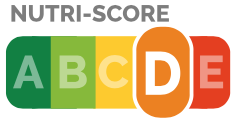

La valeur A,B,C,D et E dépend de la valeur numérique du nutriscore et les boissons se traitent différemment.
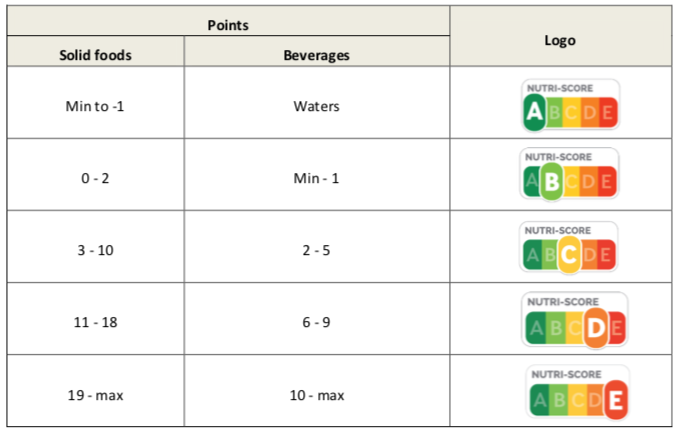

In [212]:
#Pour les fruits_juices
dfJ1 = df_Jclean2.copy()
# liste des conditions
conditions_list_J = [
    (dfJ1["nutrition-score-fr_100g"] >= 10),
    (dfJ1["nutrition-score-fr_100g"] >= 6),
    (dfJ1["nutrition-score-fr_100g"] >= 2),
    (dfJ1["nutrition-score-fr_100g"] >= dfJ1["nutrition-score-fr_100g"].min())]
# liste des choix
choicelist_J = ['E','D','C','B'] # car seules les eaux sont catégorisées A

In [213]:
#selon valeur du nutriscore numérique on lui attribue la lettre dans choicelist_J selon les  conditions_list_J 
dfJ1["Nutri_label"] = np.select(conditions_list_J, choicelist_J)
dfJ1

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter,Nutri_label
0,00472821,pressed pink lady apple juice,marks & spencer,en:squeezed-apple-juices,51.0,0.40,11.7,10.8,0.20,0.100,0.0120,0.0,0.0,6.0,fruit_juices,D
1,05017231,jus de pomme,solevita,en:squeezed-apple-juices,47.0,0.10,11.0,10.5,0.10,0.100,0.0040,0.0,0.0,4.0,fruit_juices,C
2,0569831001070,jus de pomme pur jus de provence,unknown,en:squeezed-apple-juices,44.0,0.17,10.0,9.6,0.14,0.046,0.0052,0.0,0.0,4.0,fruit_juices,C
3,1307504440004,pur jus pomme de provence,unknown,en:squeezed-apple-juices,48.0,0.50,12.0,11.0,0.50,0.100,0.0080,0.0,0.0,5.0,fruit_juices,C
4,15673367,pur jus artisanal de pomme,unknown,en:squeezed-apple-juices,52.0,0.50,13.0,11.5,0.50,0.100,0.0040,0.0,0.0,6.0,fruit_juices,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,3760002691312,pamplemousse rose pur jus,jean-louis bissardon,en:pure-grapefruit-juice,36.0,0.70,7.7,7.7,0.21,0.030,0.0020,0.0,0.0,2.0,fruit_juices,C
538,3760125983073,pur jus de pamplemousse rose,unknown,en:pure-grapefruit-juice,40.0,0.50,9.2,7.6,0.50,0.100,0.0040,0.0,0.0,2.0,fruit_juices,C
539,3760159101368,jus de pamplemousse,"très pressés,la compagnie fraiche",en:pure-grapefruit-juice,42.0,0.70,9.0,8.1,0.50,0.100,0.0040,0.0,0.0,2.0,fruit_juices,C
540,3760186970050,pamplemousse rose 100% pur jus,force bio,en:pure-grapefruit-juice,37.0,0.50,7.6,7.6,0.50,0.100,0.0040,0.0,0.0,2.0,fruit_juices,C


Pour les "yogurts" et "biscuits" ce sont les mêmes conditions, donc on va fusionner les 2 sous datasets

In [214]:
dfBY = pd.concat([df_Bclean2, df_Yclean2 ])
dfBY = dfBY.reset_index(drop = True)

conditions_list = [
    (dfBY["nutrition-score-fr_100g"] >= 19),
    (dfBY["nutrition-score-fr_100g"] >= 11),
    (dfBY["nutrition-score-fr_100g"] >= 3),
    (dfBY["nutrition-score-fr_100g"] >= 0),
    (dfBY["nutrition-score-fr_100g"] >= dfBY["nutrition-score-fr_100g"].min())]
choicelist = ['E','D','C','B','A']

In [215]:
dfBY["Nutri_label"] = np.select(conditions_list, choicelist)
dfBY

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter,Nutri_label
0,0059800501453,kit kat thé vert,nestlé,en:chocolate-biscuity-bars,542.857143,5.714286,57.142857,40.0,31.428571,22.857143,0.1000,2.0,0.0,25.0,biscuits,E
1,26028729,"gaufrettes cacao,noix de coco et glaçage cacao...",mes p'tits secrets,en:chocolate-biscuity-bars,574.000000,4.400000,56.000000,43.0,36.000000,17.000000,0.0680,3.0,1.0,26.0,biscuits,E
2,3770009551052,ze-twins,thierry court,en:chocolate-biscuity-bars,498.000000,7.000000,53.000000,33.0,28.000000,15.000000,0.1720,1.0,0.0,24.0,biscuits,E
3,3800020410929,kit kat chucky new york cheesecake,nestlé,en:chocolate-biscuity-bars,535.000000,9.700000,55.700000,48.9,30.100000,17.100000,0.1080,2.0,0.0,27.0,biscuits,E
4,3800020410998,kit kat chunky mix,nestlé,en:chocolate-biscuity-bars,539.000000,7.200000,58.000000,51.3,30.600000,17.100000,0.0920,2.0,0.0,27.0,biscuits,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,3760267350023,yaourt fermier myrtille,la ferme marty-debat,en:blueberry-yogurts,113.000000,3.700000,18.000000,15.3,2.700000,1.500000,0.0400,1.0,0.0,3.0,yogurts,C
7798,3770000451115,yaourt fermier myrtille sauvage,les p’tits fermiers,en:blueberry-yogurts,99.000000,3.300000,12.500000,12.0,3.600000,2.300000,0.0440,1.0,0.0,3.0,yogurts,C
7799,3770000451764,yaourts à la myrtille sauvage,invitation a la ferme,en:blueberry-yogurts,97.000000,3.400000,11.800000,11.3,3.600000,2.300000,0.0468,1.0,0.0,3.0,yogurts,C
7800,3770011182060,yaourt brassé myrtille,unknown,en:blueberry-yogurts,91.000000,3.200000,12.000000,11.8,3.400000,2.000000,0.0400,1.0,0.0,3.0,yogurts,C


## 7. Dataset cleané

On fusionne tous les sous-datasets ci-dessus :

In [216]:
df_clean = pd.concat([dfJ1, dfBY ])
df_clean = df_clean.reset_index(drop = True)
df_clean

,code,product_name,brands,main_category,energy-kcal_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,type_gouter,Nutri_label
0,00472821,pressed pink lady apple juice,marks & spencer,en:squeezed-apple-juices,51.0,0.40,11.7,10.8,0.20,0.100,0.0120,0.0,0.0,6.0,fruit_juices,D
1,05017231,jus de pomme,solevita,en:squeezed-apple-juices,47.0,0.10,11.0,10.5,0.10,0.100,0.0040,0.0,0.0,4.0,fruit_juices,C
2,0569831001070,jus de pomme pur jus de provence,unknown,en:squeezed-apple-juices,44.0,0.17,10.0,9.6,0.14,0.046,0.0052,0.0,0.0,4.0,fruit_juices,C
3,1307504440004,pur jus pomme de provence,unknown,en:squeezed-apple-juices,48.0,0.50,12.0,11.0,0.50,0.100,0.0080,0.0,0.0,5.0,fruit_juices,C
4,15673367,pur jus artisanal de pomme,unknown,en:squeezed-apple-juices,52.0,0.50,13.0,11.5,0.50,0.100,0.0040,0.0,0.0,6.0,fruit_juices,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8339,3760267350023,yaourt fermier myrtille,la ferme marty-debat,en:blueberry-yogurts,113.0,3.70,18.0,15.3,2.70,1.500,0.0400,1.0,0.0,3.0,yogurts,C
8340,3770000451115,yaourt fermier myrtille sauvage,les p’tits fermiers,en:blueberry-yogurts,99.0,3.30,12.5,12.0,3.60,2.300,0.0440,1.0,0.0,3.0,yogurts,C
8341,3770000451764,yaourts à la myrtille sauvage,invitation a la ferme,en:blueberry-yogurts,97.0,3.40,11.8,11.3,3.60,2.300,0.0468,1.0,0.0,3.0,yogurts,C
8342,3770011182060,yaourt brassé myrtille,unknown,en:blueberry-yogurts,91.0,3.20,12.0,11.8,3.40,2.000,0.0400,1.0,0.0,3.0,yogurts,C


In [217]:
#check valeurs manquantes
per_missing(df_clean)

code                           0.0
product_name                   0.0
brands                         0.0
main_category                  0.0
energy-kcal_100g               0.0
proteins_100g                  0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
sodium_100g                    0.0
additives_n                    0.0
ingredients_from_palm_oil_n    0.0
nutrition-score-fr_100g        0.0
type_gouter                    0.0
Nutri_label                    0.0
dtype: float64

In [218]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8344 entries, 0 to 8343
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         8344 non-null   object 
 1   product_name                 8344 non-null   object 
 2   brands                       8344 non-null   object 
 3   main_category                8344 non-null   object 
 4   energy-kcal_100g             8344 non-null   float64
 5   proteins_100g                8344 non-null   float64
 6   carbohydrates_100g           8344 non-null   float64
 7   sugars_100g                  8344 non-null   float64
 8   fat_100g                     8344 non-null   float64
 9   saturated-fat_100g           8344 non-null   float64
 10  sodium_100g                  8344 non-null   float64
 11  additives_n                  8344 non-null   float64
 12  ingredients_from_palm_oil_n  8344 non-null   float64
 13  nutrition-score-fr

On va exporter le data_set en fichier csv pour pouvoir repartir dessus.

In [219]:
df_clean.to_csv("data3_for_analysis.csv")